福州二手房房价分析及价格预测

# 项目描述

通过爬取福州在售（2023年6月）二手房信息，对爬取的数据进行清洗处理，分析各维度的数据，筛选对房价有显著影响的特征变量，探索福州二手房整体情况、价格情况和价格的影响因素，建立房价预测模型。

# 探索性数据分析（EDA）

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time, glob,os
from pandas import DataFrame
# 忽略警告提示
import warnings,os
warnings.filterwarnings('ignore')

## 读取数据

In [2]:
# 读取./data文件夹下data文件数据
source_datas = pd.read_excel('data/data.xlsx')

# 读取./data文件夹下需要预测的文件数据
p_source_datas = pd.read_excel('data/predict.xlsx')
predict_source_datas = p_source_datas.copy()

In [3]:
# 查看数据形状
print(source_datas.shape,predict_source_datas.shape)

# 查看列名
print(source_datas.columns)
print(predict_source_datas.columns)

(1983, 27) (5, 14)
Index(['小区', '随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯', '售价',
       '单价', '面积', '室', '厅', '卫', '阳', '朝向', '层高', '层', '区域', '商圈1', '商圈2',
       '年代', '姓名', '从业', '客户', '编号'],
      dtype='object')
Index(['随时可看', '满二', '满五', '带车位', '地铁房', '层高', '面积', '室', '厅', '卫', '阳', '区域',
       '商圈1', '商圈2'],
      dtype='object')


In [4]:
# 查看描述性统计信息
source_datas.describe()

,随时可看,满二,满五,复式,带花园或露台,带车位,地铁房,电梯,售价,单价,面积,室,厅,卫,阳,层,年代,从业,客户
count,896.0,1815.0,703.0,230.0,284.0,20.0,236.0,1541.0,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1973.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,271.595784,24197.216843,110.592184,3.077660,1.752900,1.724660,1.611195,19.856278,2007.930913,5.355522,410.250380
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.140054,10226.967052,51.901957,1.140494,0.534822,0.764917,0.902187,11.408302,7.042810,3.695141,387.192405
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,33.000000,7562.000000,28.460000,1.000000,0.000000,0.000000,0.000000,1.000000,1977.000000,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,155.000000,17269.000000,78.010000,2.000000,1.000000,1.000000,1.000000,8.000000,2004.000000,2.000000,125.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,226.000000,21830.000000,102.030000,3.000000,2.000000,2.000000,1.000000,18.000000,2009.000000,5.000000,320.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,330.000000,28124.500000,131.110000,4.000000,2.000000,2.000000,2.000000,32.000000,2013.000000,8.000000,536.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4500.000000,118711.000000,532.870000,9.000000,4.000000,9.000000,7.000000,55.000000,2020.000000,18.000000,2069.000000


In [5]:
def missing_check(input_df):
    # 使用 isna() 方法检查数据帧中的缺失值
    missing_values = input_df.isna()
    missing_values_mean = missing_values.sum()

    # 补全后查看缺失值情况
    return missing_values_mean[missing_values_mean > 0]

# 查看每列缺失值数量
missing_check(source_datas)

随时可看      1087
满二         168
满五        1280
复式        1753
带花园或露台    1699
带车位       1963
地铁房       1747
电梯         442
商圈1         68
商圈2        572
姓名           8
客户          10
dtype: int64

In [6]:
source_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   小区      1983 non-null   object 
 1   随时可看    896 non-null    float64
 2   满二      1815 non-null   float64
 3   满五      703 non-null    float64
 4   复式      230 non-null    float64
 5   带花园或露台  284 non-null    float64
 6   带车位     20 non-null     float64
 7   地铁房     236 non-null    float64
 8   电梯      1541 non-null   float64
 9   售价      1983 non-null   float64
 10  单价      1983 non-null   int64  
 11  面积      1983 non-null   float64
 12  室       1983 non-null   int64  
 13  厅       1983 non-null   int64  
 14  卫       1983 non-null   int64  
 15  阳       1983 non-null   int64  
 16  朝向      1983 non-null   object 
 17  层高      1983 non-null   object 
 18  层       1983 non-null   int64  
 19  区域      1983 non-null   object 
 20  商圈1     1915 non-null   object 
 21  商圈2     1411 non-null   object 
 22  

In [7]:
source_datas.head(5)

,小区,随时可看,满二,满五,复式,带花园或露台,带车位,地铁房,电梯,售价,...,层高,层,区域,商圈1,商圈2,年代,姓名,从业,客户,编号
0,三盛国际公园剑桥区,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,298.0,...,低楼层,29,晋安区,五四北,新店,2015,林国浩,4,281.0,H00673950
1,锦绣福城,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,235.0,...,低楼层,23,晋安区,五四路,斗门,2003,林群,9,581.0,H00369762
2,中庚帝国大苑,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,436.0,...,低楼层,26,晋安区,东泰禾商圈,NaN,2011,付威,13,151.0,H00542734
3,万事利花园,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,181.0,...,中楼层,8,晋安区,东泰禾商圈,塔头,1998,支武林,9,584.0,H00968931
4,家天下三木城A区,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,225.0,...,低楼层,10,晋安区,三盛国际公园,五四北泰禾,2003,詹思蓝,2,152.0,H00659064


## 数据清理

In [8]:
clean_df = source_datas.copy()

规范一下数据格式，方便探索数据异常

### 重复值

In [9]:
clean_df.duplicated().sum() #查看重复数量

0

无重复值，跳过这一步

### 缺失值

In [10]:
missing_check(clean_df)

随时可看      1087
满二         168
满五        1280
复式        1753
带花园或露台    1699
带车位       1963
地铁房       1747
电梯         442
商圈1         68
商圈2        572
姓名           8
客户          10
dtype: int64

In [11]:
missing_check(predict_source_datas)

商圈2    2
dtype: int64

In [12]:
# 查看有缺失值列的数据类型
clean_df[missing_check(clean_df).keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   随时可看    896 non-null    float64
 1   满二      1815 non-null   float64
 2   满五      703 non-null    float64
 3   复式      230 non-null    float64
 4   带花园或露台  284 non-null    float64
 5   带车位     20 non-null     float64
 6   地铁房     236 non-null    float64
 7   电梯      1541 non-null   float64
 8   商圈1     1915 non-null   object 
 9   商圈2     1411 non-null   object 
 10  姓名      1975 non-null   object 
 11  客户      1973 non-null   float64
dtypes: float64(9), object(3)
memory usage: 186.0+ KB


In [13]:
# 除了客户用出现最多的数字替换，其他列的空值用0填充
fill_cols = clean_df[missing_check(clean_df).keys()].select_dtypes(include=['float64']).columns.tolist()
fill_cols.remove('客户')

In [14]:
# 对 '随时可看'、'满二'、'满五'、'复式'、'带花园或露台'、'带车位' 和 '地铁房' 列的缺失值填充 0
clean_df[fill_cols] = clean_df[fill_cols].fillna('0')
clean_df[fill_cols] = clean_df[fill_cols].astype('int8')

In [15]:
# 对 '商圈1' 和 '商圈2' 列的缺失值填充 '无'
clean_df[['商圈1', '商圈2']] = clean_df[['商圈1', '商圈2']].fillna('无')
predict_source_datas[['商圈1', '商圈2']] = predict_source_datas[['商圈1', '商圈2']].fillna('无')

In [16]:
# 获取出现最多的顾问姓名和服务客户数
most_common_name = clean_df['姓名'].value_counts().index[0]
most_common_count = clean_df['姓名'].value_counts().values[0]

# 顾问姓名用出现最多的人填充，客户用对应顾问的客户数填充
clean_df['姓名'] = clean_df['姓名'].fillna(most_common_name)
clean_df['客户'] = clean_df['客户'].fillna(most_common_count)
clean_df['客户'] = clean_df['客户'].astype('int16')

In [17]:
missing_check(clean_df)

Series([], dtype: int64)

### 异常值

In [18]:
exception_df = clean_df.copy()

In [19]:
exception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   小区      1983 non-null   object 
 1   随时可看    1983 non-null   int8   
 2   满二      1983 non-null   int8   
 3   满五      1983 non-null   int8   
 4   复式      1983 non-null   int8   
 5   带花园或露台  1983 non-null   int8   
 6   带车位     1983 non-null   int8   
 7   地铁房     1983 non-null   int8   
 8   电梯      1983 non-null   int8   
 9   售价      1983 non-null   float64
 10  单价      1983 non-null   int64  
 11  面积      1983 non-null   float64
 12  室       1983 non-null   int64  
 13  厅       1983 non-null   int64  
 14  卫       1983 non-null   int64  
 15  阳       1983 non-null   int64  
 16  朝向      1983 non-null   object 
 17  层高      1983 non-null   object 
 18  层       1983 non-null   int64  
 19  区域      1983 non-null   object 
 20  商圈1     1983 non-null   object 
 21  商圈2     1983 non-null   object 
 22  

In [20]:
# 指定每列的数据类型
dtypes = {'室': 'int8', '厅': 'int8', '卫': 'int8', '阳': 'int8', 
          '朝向': 'category', '层高': 'category', '区域': 'category', 
          '面积': 'float32', '售价': 'float32', '单价': 'float32',
          '年代': 'int16', '层': 'int8', '从业': 'int8'}

# 使用 astype() 方法修改每列的数据类型
exception_df = exception_df.astype(dtypes)

In [21]:
# 查看最大最小值
exception_df.describe().loc[['min', 'max']] #确认最小最大值

,随时可看,满二,满五,复式,带花园或露台,带车位,地铁房,电梯,售价,单价,面积,室,厅,卫,阳,层,年代,从业,客户
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,7562.0,28.459999,1.0,0.0,0.0,0.0,1.0,1977.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4500.0,118711.0,532.869995,9.0,4.0,9.0,7.0,55.0,2020.0,18.0,2069.0


In [22]:
exception_check = exception_df[['室','厅','卫','阳','面积','年代','单价','层']]
exception_check.describe()

,室,厅,卫,阳,面积,年代,单价,层
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,3.077660,1.752900,1.724660,1.611195,110.592178,2007.930913,24197.216797,19.856278
std,1.140494,0.534822,0.764917,0.902187,51.901955,7.042810,10226.966797,11.408302
min,1.000000,0.000000,0.000000,0.000000,28.459999,1977.000000,7562.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,78.010002,2004.000000,17269.000000,8.000000
50%,3.000000,2.000000,2.000000,1.000000,102.029999,2009.000000,21830.000000,18.000000
75%,4.000000,2.000000,2.000000,2.000000,131.110001,2013.000000,28124.500000,32.000000
max,9.000000,4.000000,9.000000,7.000000,532.869995,2020.000000,118711.000000,55.000000


#### 绘制查看箱线图

室的合理范围是  0 至 7.0
厅的合理范围是  0 至 3.5
卫的合理范围是  0 至 3.5
阳的合理范围是  0 至 3.5
面积的合理范围是  0 至 210.76
年代的合理范围是  1990.5 至 2026.5
单价的合理范围是  985.75 至 44407.75
层的合理范围是  0 至 68.0


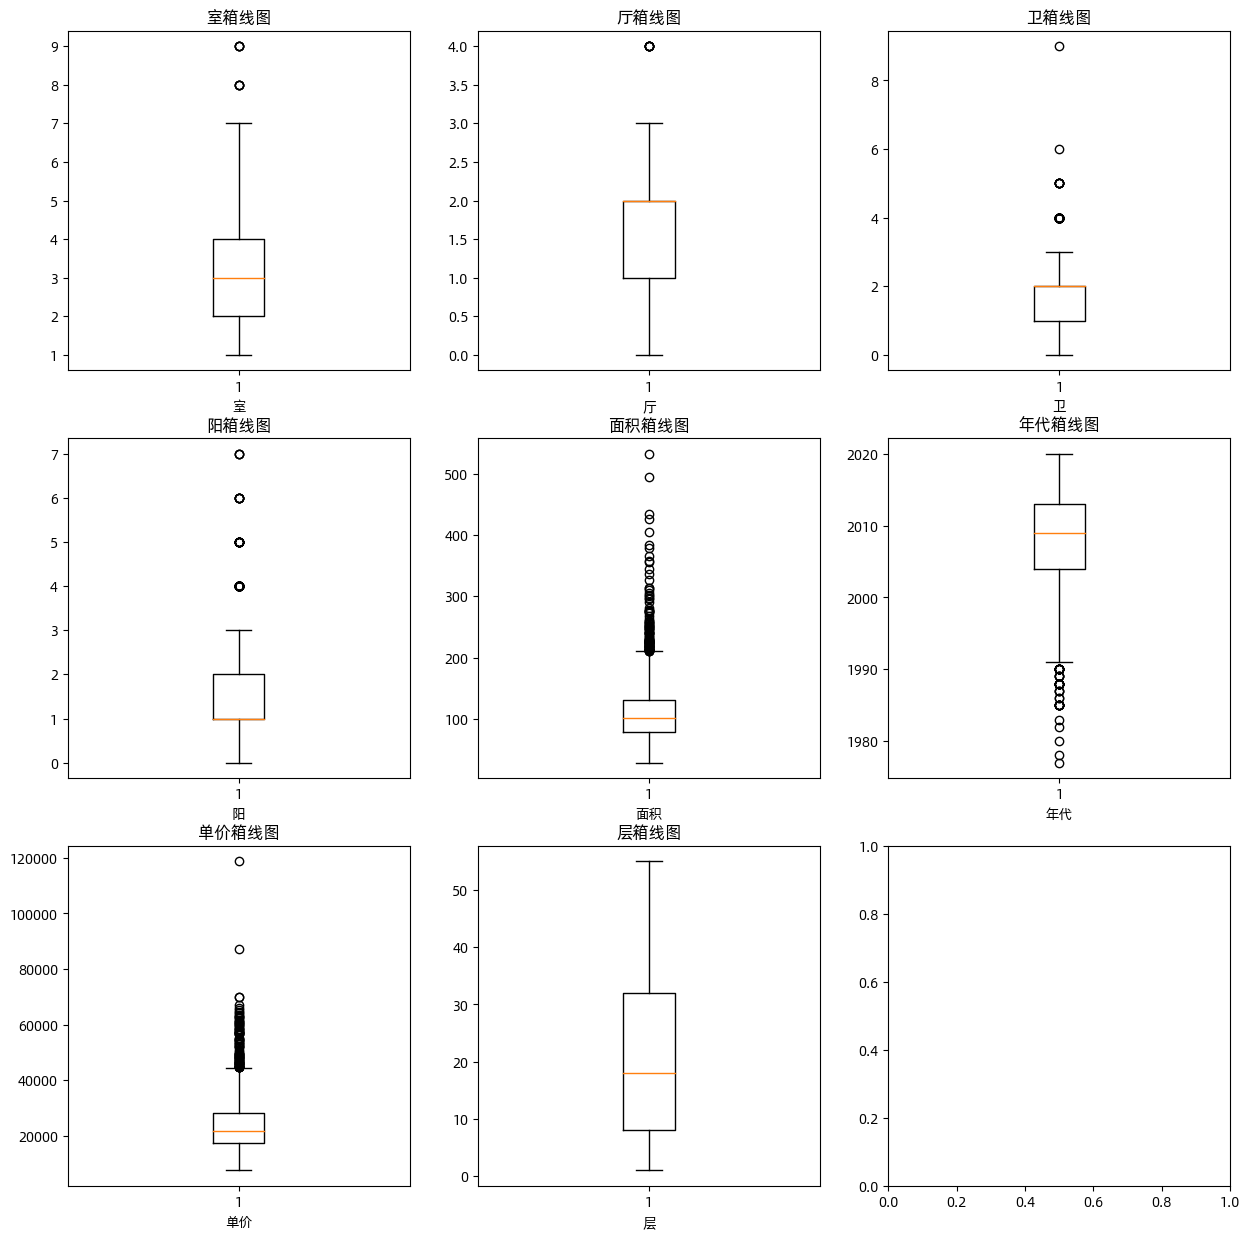

In [23]:
# 创建一个空的字典来存储范围
range_dict = {}


# 设置子图的行数和列数
n_rows = (len(exception_check.columns) + 2) // 3
n_cols = min(3, len(exception_check.columns))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, feature in enumerate(exception_check.columns):
    # 计算特征的上下四分位数
    q1_feature = round(exception_check[feature].quantile(0.25),2)
    q3_feature = round(exception_check[feature].quantile(0.75),2)
    # 计算四分位距
    iqr_feature = q3_feature - q1_feature
    # 计算异常值范围
    lower_bound = round(q1_feature - 1.5 * iqr_feature, 2)
    upper_bound = round(q3_feature + 1.5 * iqr_feature, 2)
    if lower_bound < 0: lower_bound = 0
    print(f'{feature}的合理范围是  {lower_bound} 至 {upper_bound}')
    # 存储特征的范围到字典中
    if feature!='年代':
        range_dict[feature] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}


    # 绘制箱线图
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]
    ax.boxplot(exception_check[feature], whis=1.5)
    ax.set_title(f'{feature}箱线图')
    ax.set_xlabel(feature)

#### 删除异常值

In [24]:
range_dict

{'室': {'lower_bound': 0, 'upper_bound': 7.0},
 '厅': {'lower_bound': 0, 'upper_bound': 3.5},
 '卫': {'lower_bound': 0, 'upper_bound': 3.5},
 '阳': {'lower_bound': 0, 'upper_bound': 3.5},
 '面积': {'lower_bound': 0, 'upper_bound': 210.76},
 '单价': {'lower_bound': 985.75, 'upper_bound': 44407.75},
 '层': {'lower_bound': 0, 'upper_bound': 68.0}}

In [25]:
# 通过range_dict筛选出异常数据
for feature in range_dict.keys():
    feature_df = exception_df[(exception_df[feature]>range_dict[feature]['upper_bound']) | (exception_df[feature]<range_dict[feature]['lower_bound'])]
    # 从原始数据集中删除异常数据
    exception_df = exception_df.drop(feature_df.index)
    print(f'[{feature}] 删除异常数据量：{len(feature_df)}')


[室] 删除异常数据量：8
[厅] 删除异常数据量：5
[卫] 删除异常数据量：44
[阳] 删除异常数据量：46
[面积] 删除异常数据量：53
[单价] 删除异常数据量：77
[层] 删除异常数据量：0


In [26]:
exception_df.shape

(1750, 27)

#### 层和层高关系异常

In [27]:
exception_df[['层','层高']][exception_df['层高']=='低楼层'].describe()

,层
count,566.000000
mean,21.457597
std,10.738771
min,4.000000
25%,11.000000
50%,19.000000
75%,32.000000
max,55.000000


层和层高没有关系，用层高重新进行高中低分桶

In [28]:
exception_df['层'].describe()

count    1750.000000
mean       20.500571
std        11.114239
min         1.000000
25%         9.000000
50%        18.000000
75%        32.000000
max        55.000000
Name: 层, dtype: float64

In [29]:
# 将数据列"层"分成3个桶，标签分别为"高楼层"、"中楼层"、"低楼层"
bins = [0, 18, 37, 55]
labels = ['低楼层', '中楼层', '高楼层']
exception_df['层高'] = pd.cut(exception_df['层'], bins=bins, labels=labels)


In [30]:
exception_df[['层','层高']][exception_df['层高']=='中楼层'].describe()
del exception_df['层']

## 特征探索

### 热门商圈和小区

In [31]:
display_df = exception_df.copy()

In [32]:
# 对 '商圈1' 列进行计数
counts1 = display_df[display_df['商圈1']!='无']['商圈1'].value_counts()

# 对 '商圈2' 列进行计数
counts2 = display_df[display_df['商圈2']!='无']['商圈2'].value_counts()

# 将 '商圈1' 和 '商圈2' 列的计数相加
shoppingCenter_counts = counts1.add(counts2, fill_value=0)

In [33]:
# 对不同小区计数
xiaoqu_counts = display_df['小区'].value_counts()

词云图

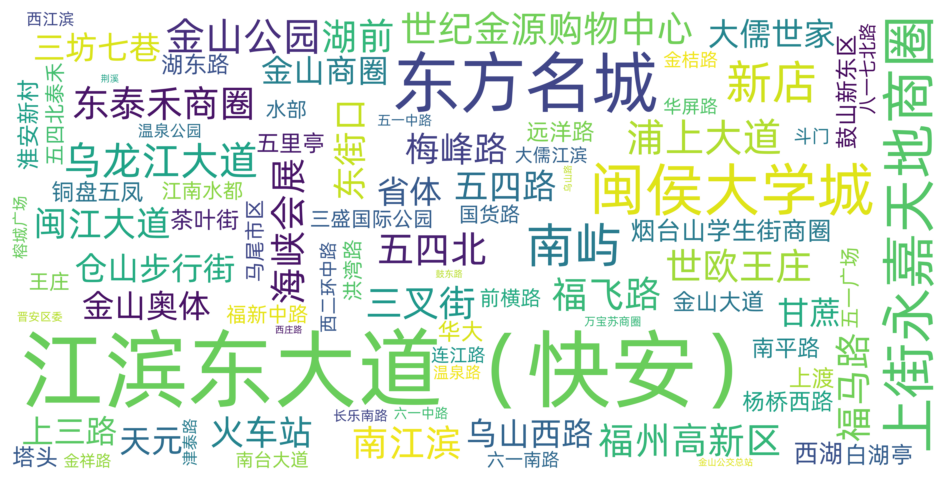

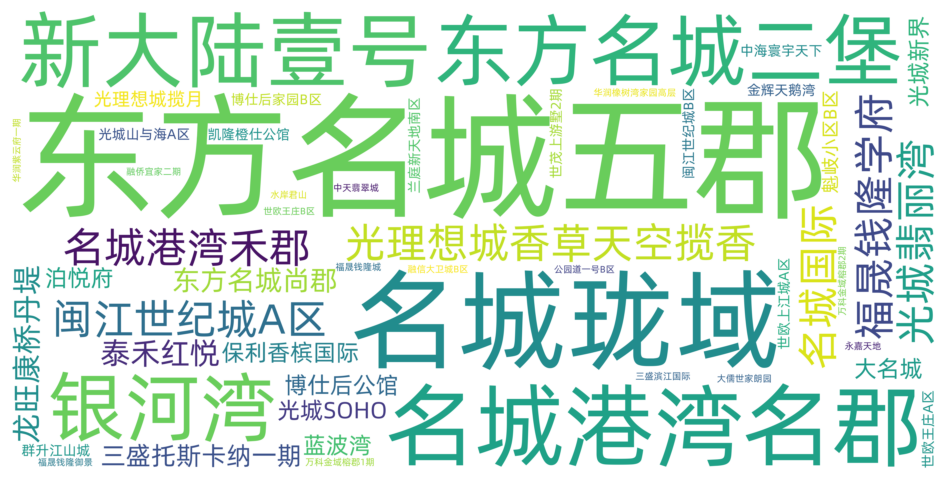

In [34]:
from wordcloud import WordCloud

# 设置字体文件路径
font_path = r'/Users/studyz/Library/Fonts/AlibabaPuHuiTi-2-55-Regular.ttf'

def darw_wordcloud(font_path:str,data):
    # 生成词云图
    wordcloud = WordCloud(background_color='white', font_path=font_path, scale=20).generate_from_frequencies(data)

    # 创建 Figure 对象并设置大小
    fig = plt.figure(figsize=(12, 8))
    # 绘制词云图
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # 调整图形布局
    plt.show()
    
    
for cnt in shoppingCenter_counts,xiaoqu_counts:
    darw_wordcloud(font_path,cnt)

### 单价和特征的关系

In [35]:
display_df.columns

Index(['小区', '随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯', '售价',
       '单价', '面积', '室', '厅', '卫', '阳', '朝向', '层高', '区域', '商圈1', '商圈2', '年代',
       '姓名', '从业', '客户', '编号'],
      dtype='object')

In [36]:
# 定义箱线图绘制function，方便后续频繁调用
def draw_boxplot(data, x, y, order=None, palette=None, width=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x=x, y=y, data=data, order=order, palette=palette, width=width)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
        for i, median in enumerate(data.groupby(x)[y].median().sort_values()):
            ax.text(i, median, f'{median:.2f}', ha='center', va='center', color='red', fontsize=12)
    if ylabel:
        plt.ylabel(ylabel)
    
    plt.show()

#### 整体单价水平

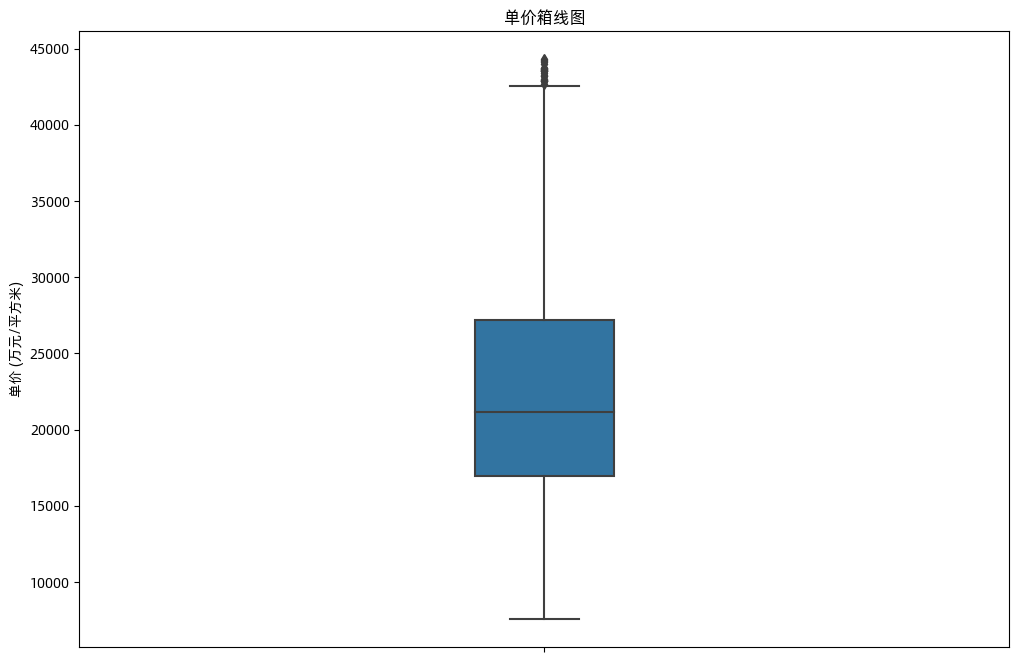

In [37]:
draw_boxplot(data=display_df, x=None, y='单价', title='单价箱线图', ylabel='单价 (万元/平方米)')

#### 单价和标签

In [38]:
bool_list = ['随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯']

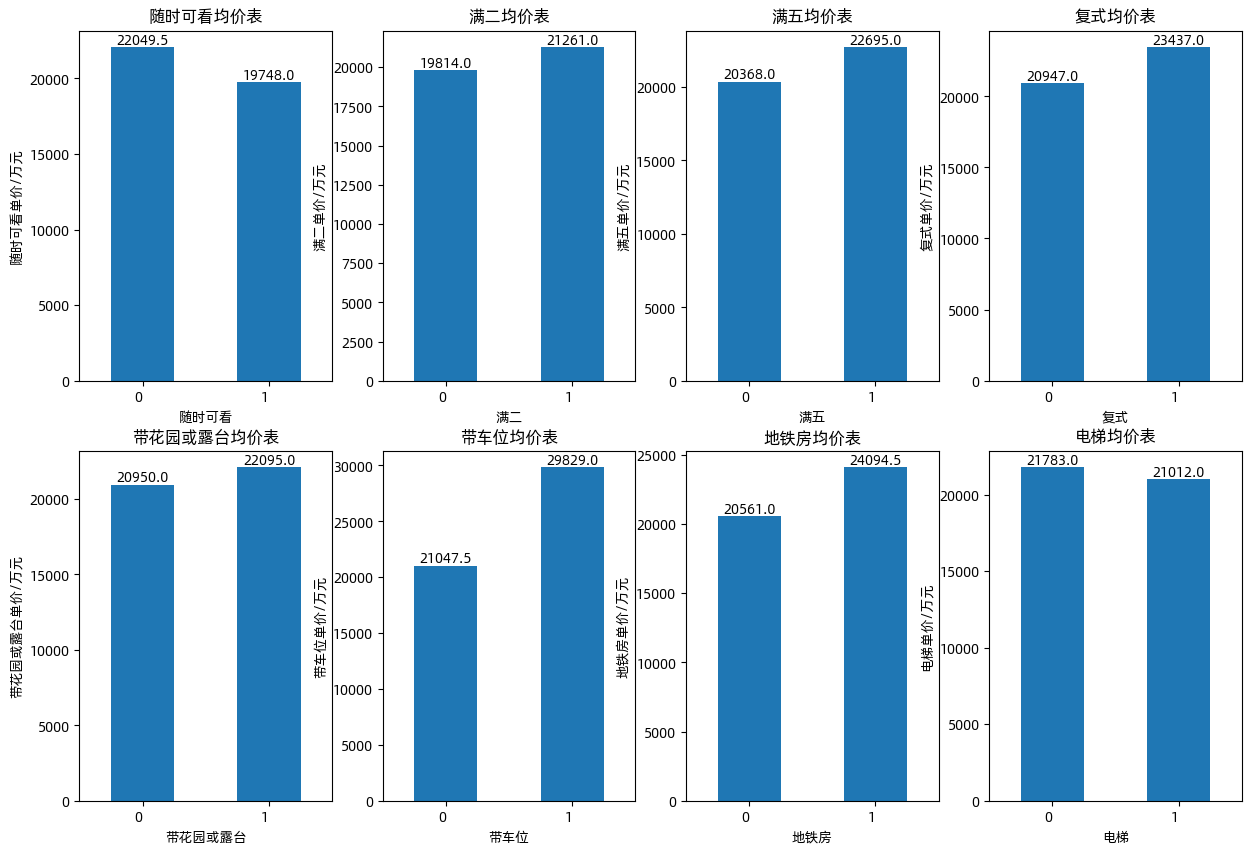

In [39]:
# 设置子图的行数和列数
n_rows = (len(bool_list) + 2) // 4
n_cols = min(4, len(bool_list))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, attr in enumerate(bool_list):
    # 按不同分类查看单位面积价格中位数
    median_prices = display_df.groupby(attr)['单价'].median()


    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]

    # 绘制柱状图 Create a bar plot of the median prices
    median_prices.plot(kind='bar', ax=ax)

    # 设置图参数 Add a title and axis labels
    ax.set_title(f'{attr}均价表')
    # 设置 x 轴标签
    ax.set_xticklabels(median_prices.index, rotation=0, ha='right')
    ax.set_ylabel(f'{attr}单价/万元')

    # 在柱状图上显示中位数
    for j, v in enumerate(median_prices):
        ax.text(j, v, round(v, 1), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

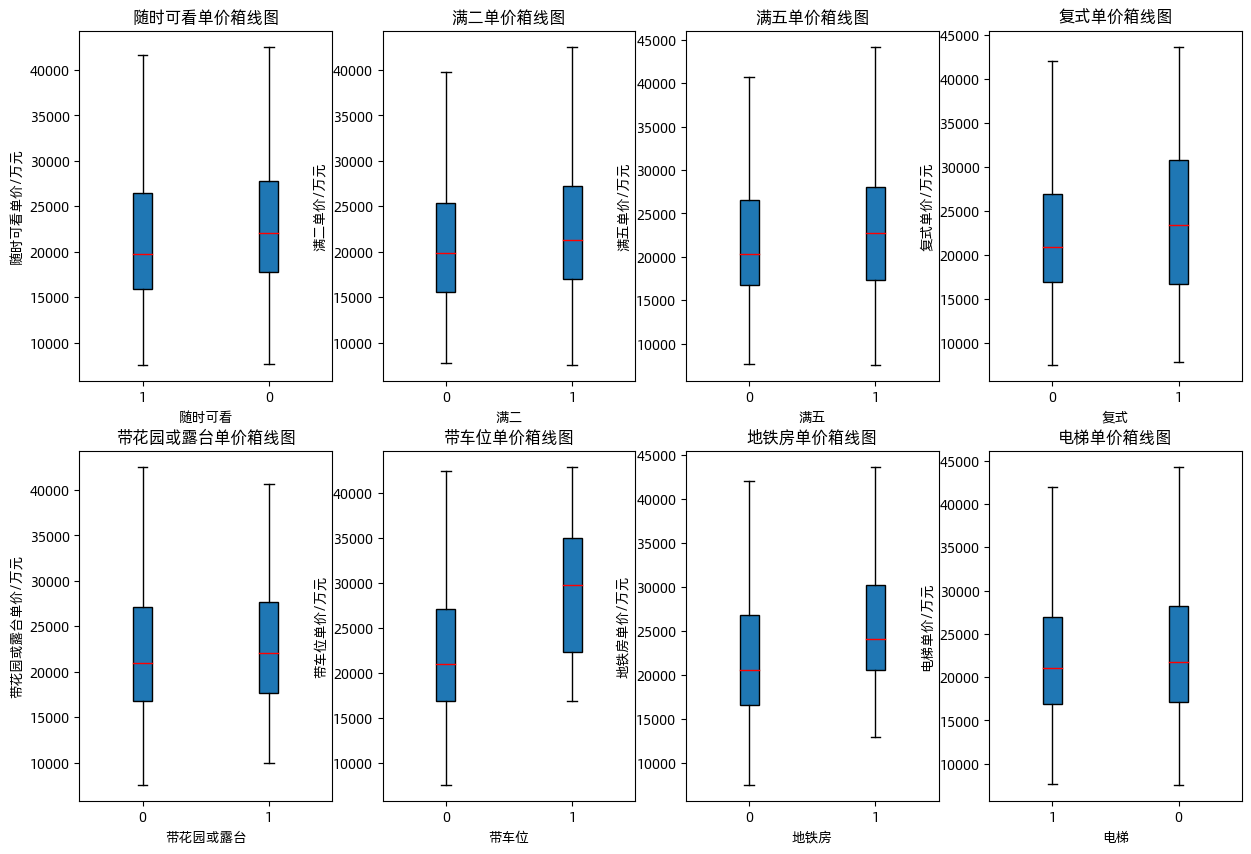

In [40]:
# 设置子图的行数和列数
n_rows = (len(bool_list) + 2) // 4
n_cols = min(4, len(bool_list))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, feature in enumerate(bool_list):
    # 按不同分类查看单位面积价格中位数
    median_prices = display_df.groupby(feature)['单价'].median().sort_values()
    sorted_index = median_prices.index

    # 绘制箱线图
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]

    # 修改过的代码
    boxplot_data = [display_df.loc[display_df[feature] == index, '单价'] for index in sorted_index]
    
    
    ax.boxplot(boxplot_data, whis=1.5, labels=sorted_index, showfliers=False, patch_artist=True, medianprops=dict(color='red'))
    # 设置图形参数
    ax.set_title(f'{feature}单价箱线图')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'{feature}单价/万元')

# 调整子图之间的间距
# plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 显示图形
plt.show()

- 随时可看：可以看出单价，标注随时可看的房子，可能急于出手，单价偏低；
- 满二、满五：满五对单价的影响更大些；
- 复式：复式的单价更高；
- 带花园或露台：相关性不大；
- 带车位：带车位的房子单价高出很多；
- 地铁房：很明显靠近地铁单价高，相关性高；
- 电梯：是否有电梯和单价相关性低，可以忽略。

总结：初步观察，随时可看、满二、满五、复式、带车位、地铁房特征和单价相关性较高，带花园或露台和电梯相关性较低，可以删除

In [41]:
attr_list = ['室', '厅','卫', '阳', '朝向', '层高']

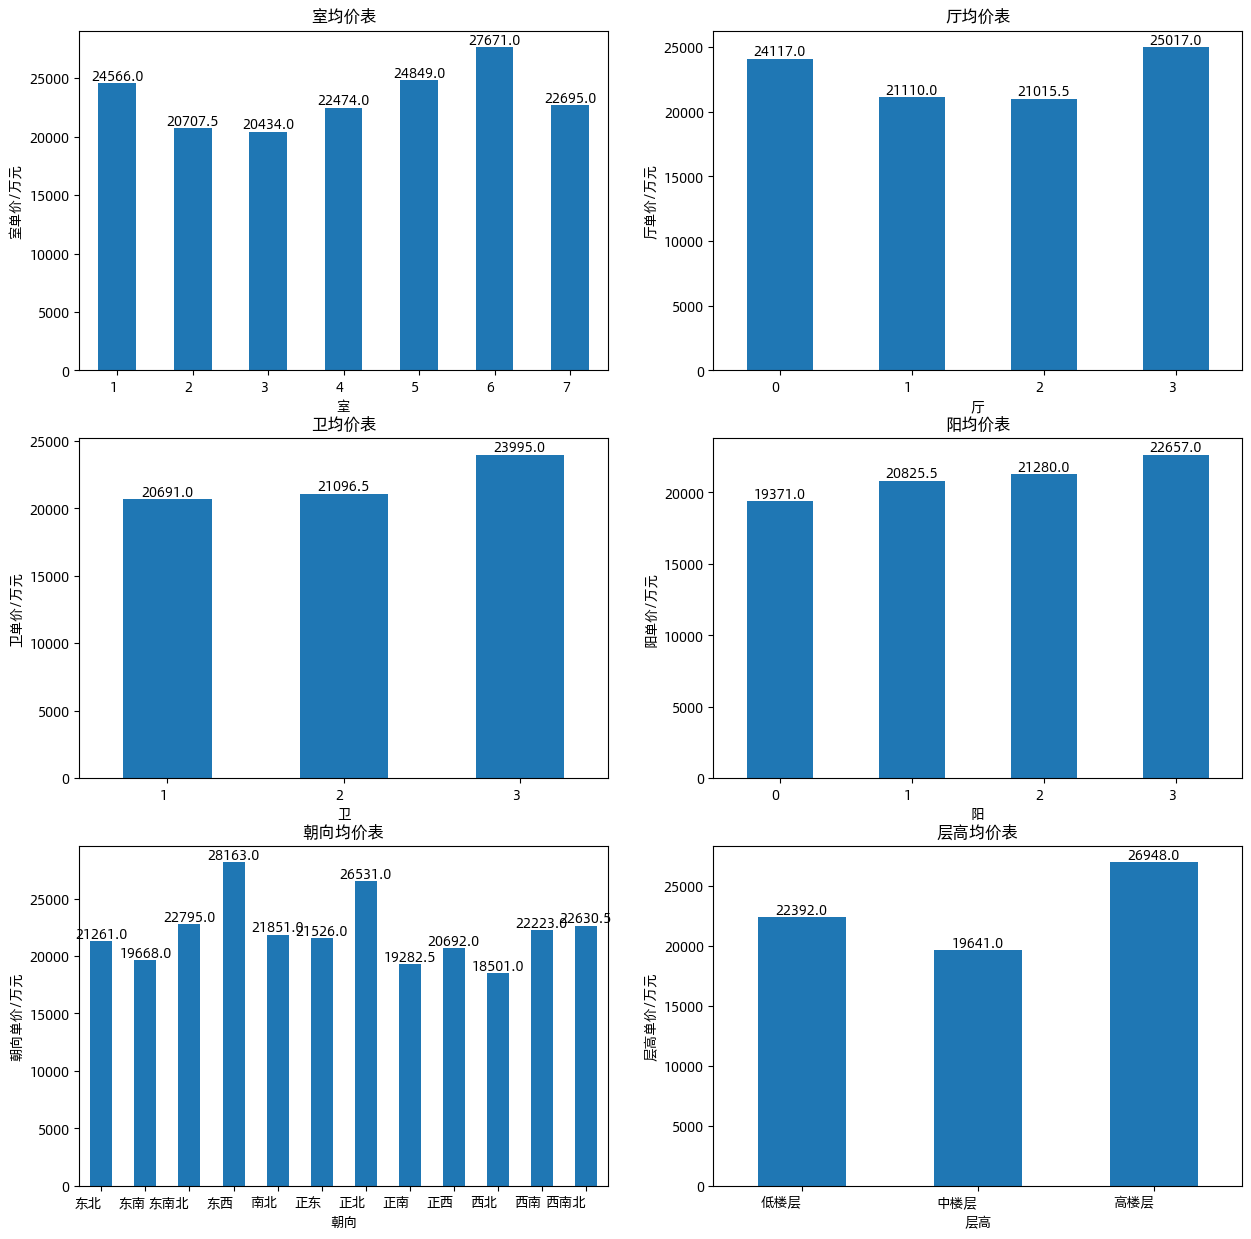

In [42]:
# 设置子图的行数和列数
n_rows = (len(attr_list) + 1) // 2
n_cols = min(2, len(attr_list))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, attr in enumerate(attr_list):
    # 按不同分类查看单位面积价格中位数
    median_prices = display_df.groupby(attr)['单价'].median()

    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]

    # 绘制柱状图 Create a bar plot of the median prices
    median_prices.plot(kind='bar', ax=ax)

    # 设置图参数 Add a title and axis labels
    ax.set_title(f'{attr}均价表')
    # 设置 x 轴标签
    ax.set_xticklabels(median_prices.index, rotation=0, ha='right')
    ax.set_ylabel(f'{attr}单价/万元')

    # 在柱状图上显示中位数
    for j, v in enumerate(median_prices):
        ax.text(j, v, round(v, 1), ha='center', va='bottom', fontsize=10)
# Show the plot
plt.show()

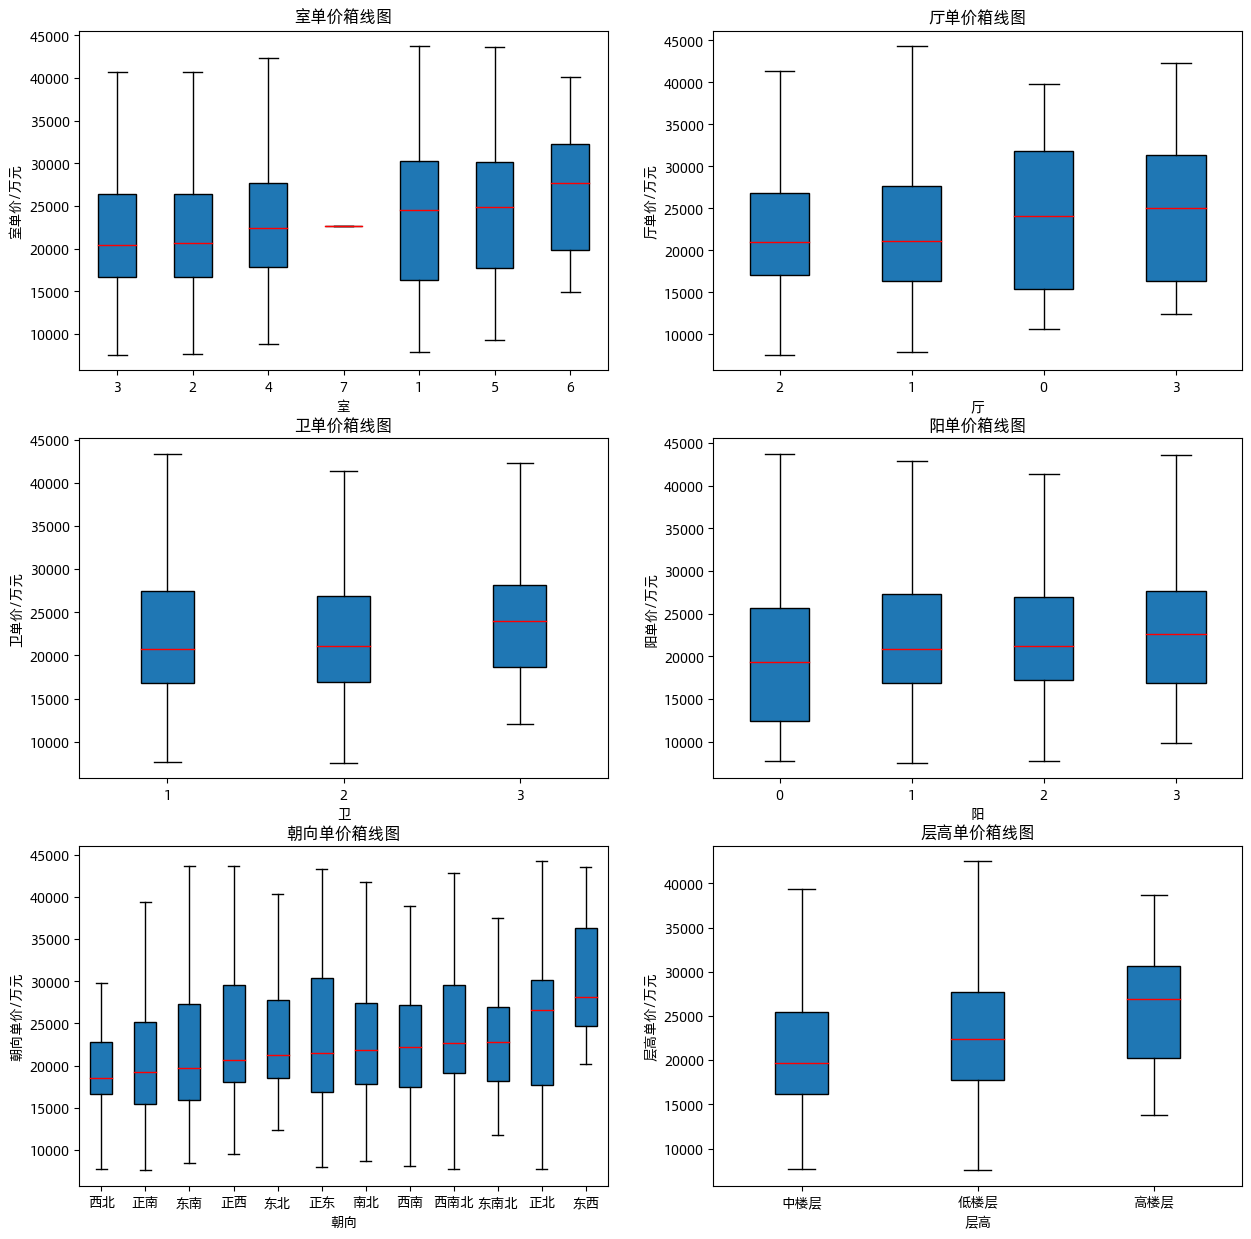

In [43]:
# 设置子图的行数和列数
n_rows = (len(attr_list) + 1) // 2
n_cols = min(2, len(attr_list))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, feature in enumerate(attr_list):
    # 按不同分类查看单位面积价格中位数
    median_prices = display_df.groupby(feature)['单价'].median().sort_values()
    sorted_index = median_prices.index

    # 绘制箱线图
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]

    # 修改过的代码
    boxplot_data = [display_df.loc[display_df[feature] == index, '单价'] for index in sorted_index]
    ax.boxplot(boxplot_data, whis=1.5, labels=sorted_index, showfliers=False, patch_artist=True, medianprops=dict(color='red'))
    # 设置图形参数
    ax.set_title(f'{feature}单价箱线图')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'{feature}单价/万元')

# 调整子图之间的间距
# plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 显示图形
plt.show()

- 室、厅、卫、阳：数量越多，意味着户型越好，基本是越多单价越贵；
- 朝向：东西朝向的房子单价最贵，正北朝向第二贵，这个和中国坐北朝南的偏好不符，怀疑是数据量缺失的问题，或者是福建山多的原因造成，这里mark一下；
- 层高：中楼层最便宜，符合常识；

#### 单价和区域

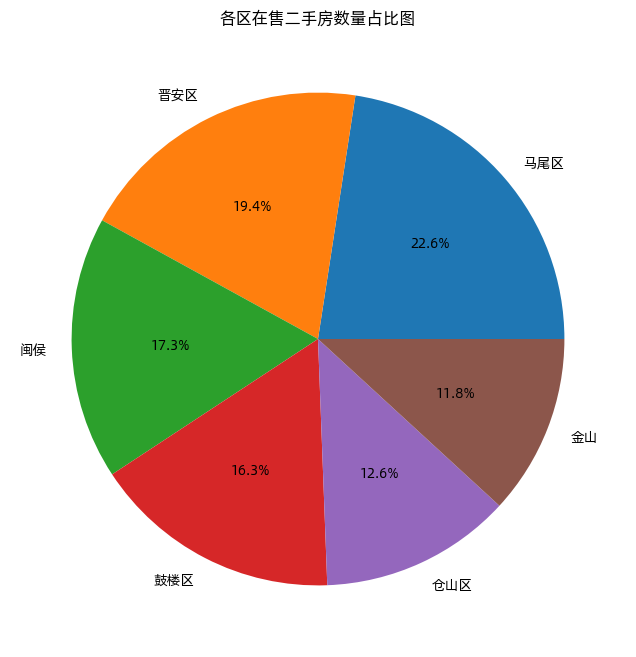

In [44]:
# 统计各个区域的房屋数量
counts = display_df['区域'].value_counts()

# 绘制饼图，autopct 参数用于设置数字显示格式
plt.figure(figsize=(12,8))
plt.pie(x=counts, labels=counts.index, autopct='%1.1f%%')
plt.title('各区在售二手房数量占比图')

# Show the plot
plt.show()

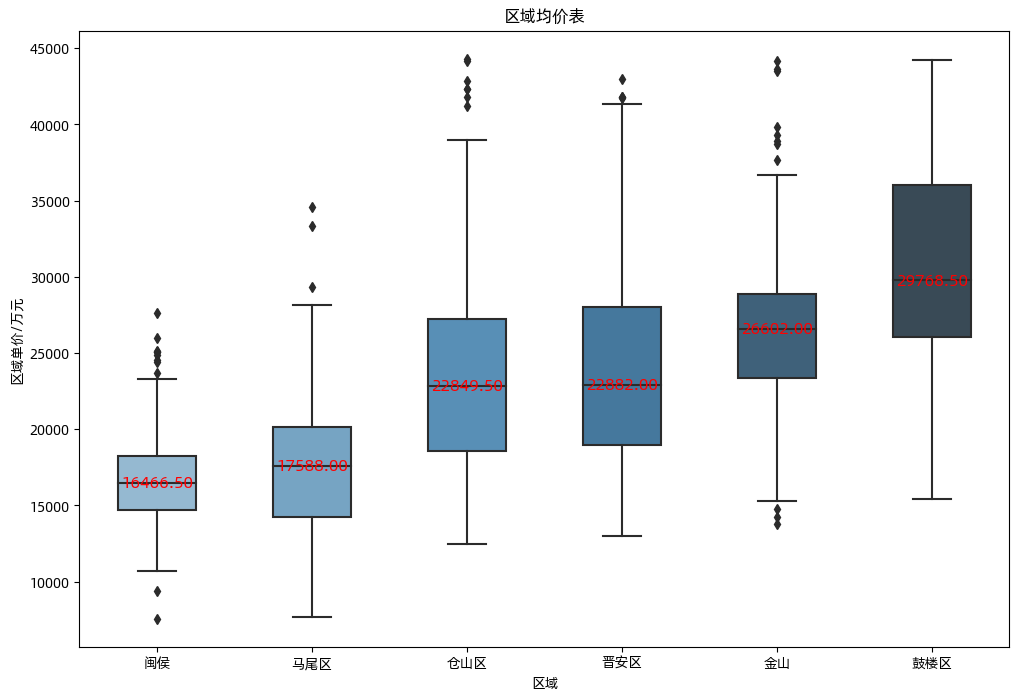

In [45]:
# 按不同分类查看单位面积价格中位数
median_prices = display_df.groupby('区域')['单价'].median().sort_values()
sorted_index = median_prices.index

draw_boxplot(data=display_df, x='区域', y='单价', order=sorted_index,palette='Blues_d', width=0.5, title='区域均价表', xlabel='区域', ylabel='区域单价/万元')

- 鼓楼区作为福州市中心区，价格最高。
- 排名第二是金山区，不太清楚具体原因，可能是数据不全，或者金山有好的小区？
- 闽侯最便宜。

#### 单价和小区

In [46]:
# 绘制条形图
def draw_single_bar(df, x, y, title, xlabel, ylabel,figsizeX,figsizeY):
    fig, ax = plt.subplots(figsize=(figsizeX,figsizeY))
    ax.bar(df[x], df[y])
    # 添加标题和标签
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # 在柱状图上显示y中位数
    for j, v in enumerate(df[y].values):
        ax.text(j, v, round(v, 1), ha='center', va='bottom', fontsize=10)
        # 旋转x轴标签，以避免重叠
    plt.xticks(rotation=45)
    # 显示图形
    plt.show()

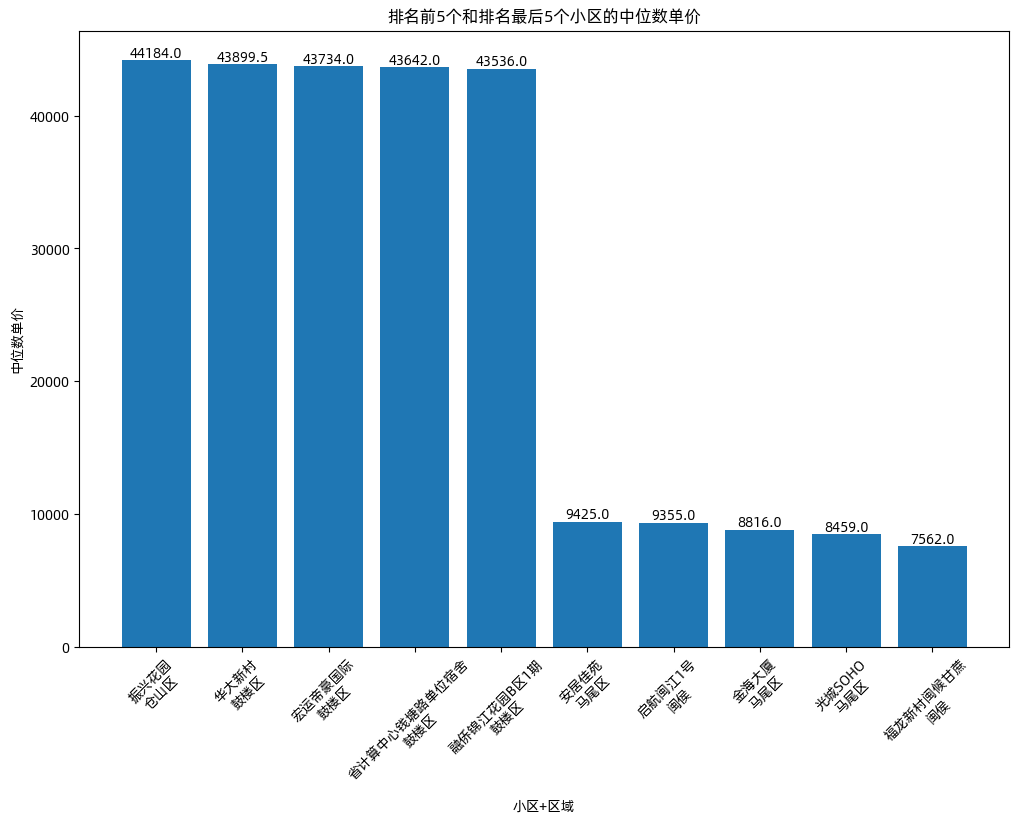

In [47]:
# 按照小区的中位数单价进行排序
median_prices = display_df.groupby('小区')['单价'].median().sort_values(ascending=False)

# 获取排名前5个商圈
top5 = median_prices.head(5)
# 获取排名最后5个商圈
bottom5 = median_prices.tail(5)

# 将排名前5个商圈和排名最后5个商圈合并为一个 DataFrame
xiaoqu_df = pd.concat([top5, bottom5]).reset_index().rename(columns={'单价': '中位数单价'})

# 匹配小区和区域
merged_df = pd.merge(xiaoqu_df, display_df[['小区', '区域']], on='小区')

# 添加区域列
merged_df = merged_df[['区域', '小区', '中位数单价']].reset_index(drop=True).drop_duplicates()
merged_df['小区+区域'] = merged_df['小区'].astype(str) + '\n' + merged_df['区域'].astype(str)


draw_single_bar(merged_df,'小区+区域','中位数单价','排名前5个和排名最后5个小区的中位数单价','小区+区域','中位数单价',12,8)

- 中位数最贵的小区是【振兴花园】。学区房，周边小中大学齐全，靠近福州烟台山热门商业圈，靠近地铁；
- 前五其他都是福州中心鼓楼区的小区；

##### 区域单价最高小区

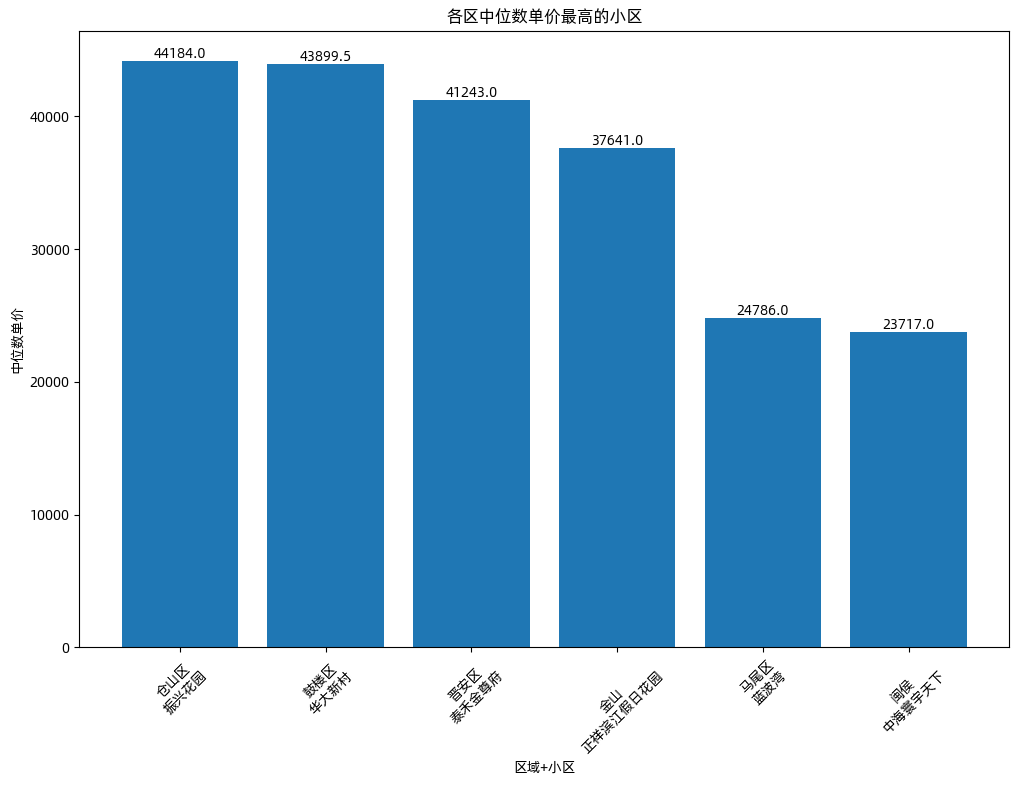

In [48]:
dfs = []
for location in display_df['区域'].unique():
    source_data = display_df[display_df['区域']== location]
    median_prices = source_data.groupby('小区', as_index=False)['单价'].median().sort_values(by='单价', ascending=False)
    top = median_prices.head(1)
    dfs.append(top)

quyu_top = pd.concat(dfs).reset_index(drop=True)

# 匹配小区和区域
merged_df = pd.merge(quyu_top, display_df[['小区', '区域']], on='小区')
# 添加区域列
merged_df = merged_df[['区域', '小区', '单价']].reset_index(drop=True).drop_duplicates()
merged_df['区域+小区'] = merged_df['区域'].astype(str) + '\n' + merged_df['小区'].astype(str)

# Assuming 'merged_df' is the DataFrame containing the merged data
merged_df_sorted = merged_df.sort_values(by='单价', ascending=False)


draw_single_bar(merged_df_sorted,'区域+小区','单价','各区中位数单价最高的小区','区域+小区','中位数单价',12,8)

- 福州各区最贵小区的中位数单价在4万左右，马尾和闽侯最贵小区的单价相对便宜

#### 单价和商圈

In [49]:
# 将商圈1、商圈2拆分并合并成一列
business_datas = pd.melt(display_df, id_vars=['随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯', '面积', '室', '厅', '卫', '阳', '朝向', '层高', '区域', '年代', '单价', '小区', '售价', '姓名', '从业', '客户', '编号'], value_vars=['商圈1', '商圈2'], var_name='商圈序号', value_name='商圈')
# 删除列
business_datas.drop('商圈序号', axis=1, inplace=True)
# 查看并删除重复列
business_datas.drop_duplicates(inplace=True)
# duplicates,查看重复的内容
duplicates = business_datas[business_datas.duplicated(keep='first')]


In [50]:
def get_shoppingCenterRank(datas):
    # 按照商圈的中位数单价进行排序
    median_prices = datas.groupby('商圈')['单价'].median().sort_values(ascending=False)
    # 添加排名列
    shopping_center_rank = median_prices.rank(ascending=True)
    # 将排名列添加到数据集中
    median_prices = pd.concat([median_prices, shopping_center_rank.rename('权重')], axis=1)
    return median_prices

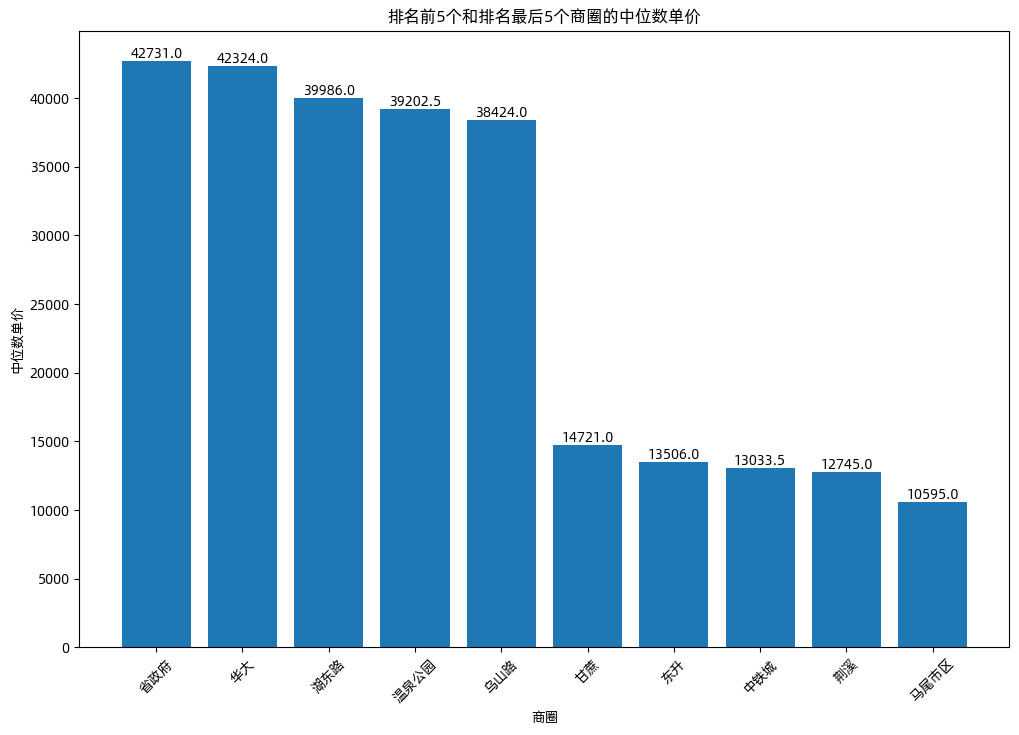

In [51]:
rank_df = get_shoppingCenterRank(business_datas)

# 获取排名前5个商圈
top5 = rank_df.head(5)
# 获取排名最后5个商圈
bottom5 = rank_df.tail(5)

# 将排名前5个商圈和排名最后5个商圈合并为一个 DataFrame
shoppingCenter_display_df = pd.concat([top5, bottom5]).reset_index()
draw_single_bar(shoppingCenter_display_df,'商圈','单价','排名前5个和排名最后5个商圈的中位数单价','商圈','中位数单价',12,8)


In [52]:
shoppingCenter_rank_df = rank_df.reset_index()

#### 单价和户型

In [53]:
# 定义分类函数
def classify(x):
    if x['室'] + x['厅'] <=4 and x['卫'] <= 1:
        return '小户型'
    elif x['室'] + x['厅'] <= 5 and x['卫'] <= 2:
        return '中户型'
    elif x['室'] + x['厅'] <= 6 and x['卫'] <= 3:
        return '大户型'
    else:
        return '超大户型'
        


# 添加分类列
display_df['户型'] = display_df.apply(classify, axis=1)
# 将 '户型' 列转换为 category 类型，并按照指定的顺序定义类别
category_order = ['小户型', '中户型', '大户型', '超大户型']
display_df['户型'] = pd.Categorical(display_df['户型'], categories=category_order, ordered=True)

# 顺便把需要预测的户型判断一下
predict_source_datas['户型'] = predict_source_datas.apply(classify, axis=1)
predict_source_datas['户型'] = pd.Categorical(predict_source_datas['户型'], categories=category_order, ordered=True)

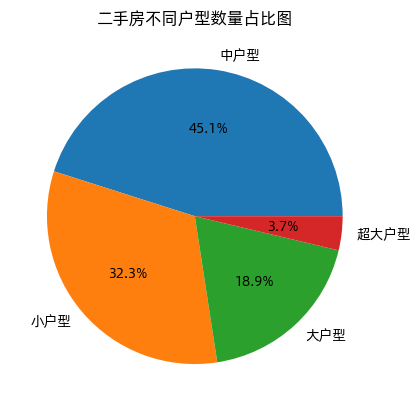

In [54]:
# 统计各个区域的房屋数量
counts = display_df['户型'].value_counts()

# 绘制饼图，autopct 参数用于设置数字显示格式
plt.pie(x=counts, labels=counts.index, autopct='%1.1f%%')
plt.title('二手房不同户型数量占比图')

# Show the plot
plt.show()

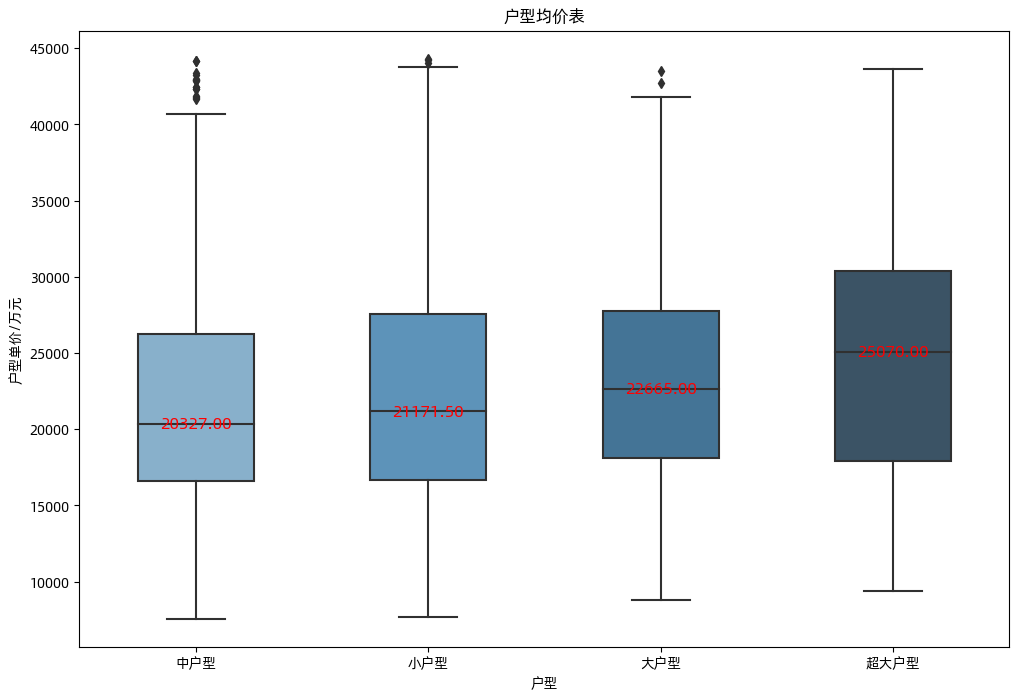

In [55]:
# 按不同户型查看单位面积价格中位数
type_median_prices = display_df.groupby('户型')['单价'].median().sort_values()
type_sorted_index = type_median_prices.index

draw_boxplot(data=display_df, x='户型', y='单价', order=type_sorted_index, palette='Blues_d', width=0.5,title='户型均价表', xlabel='户型', ylabel='户型单价/万元')

### 销售顾问

#### 销售和房源数量

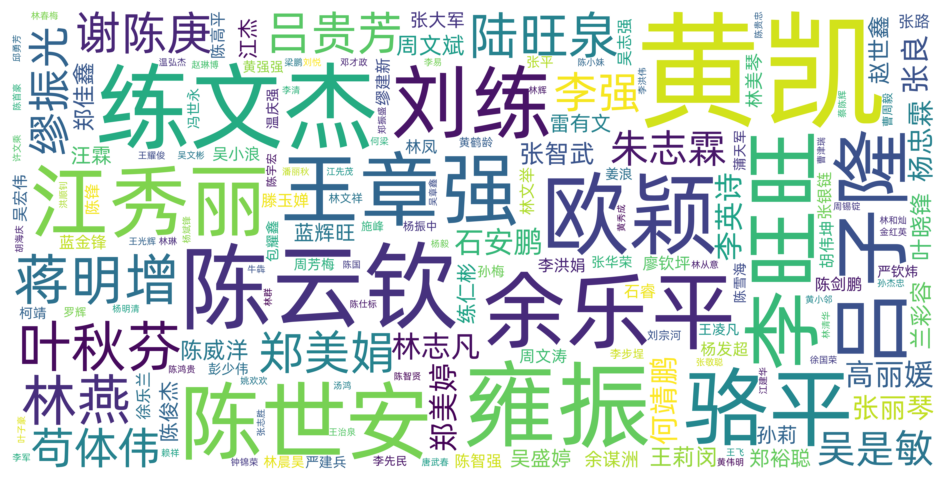

In [56]:
consultant_counts = display_df['姓名'].value_counts()


darw_wordcloud(font_path,consultant_counts)

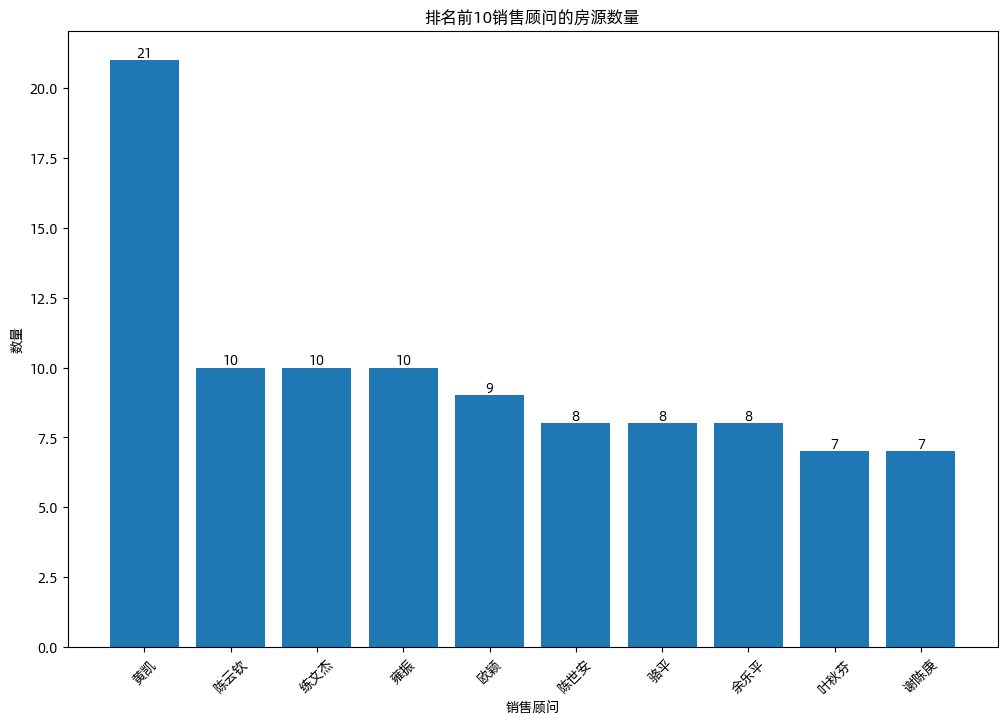

In [57]:
# 获取排名前10
consultant_top10 = consultant_counts.sort_values( ascending=False).head(10).reset_index()
consultant_top10.columns = ['姓名','数量']

draw_single_bar(consultant_top10,'姓名','数量','排名前10销售顾问的房源数量','销售顾问','数量',12,8)

#### 从业分布图

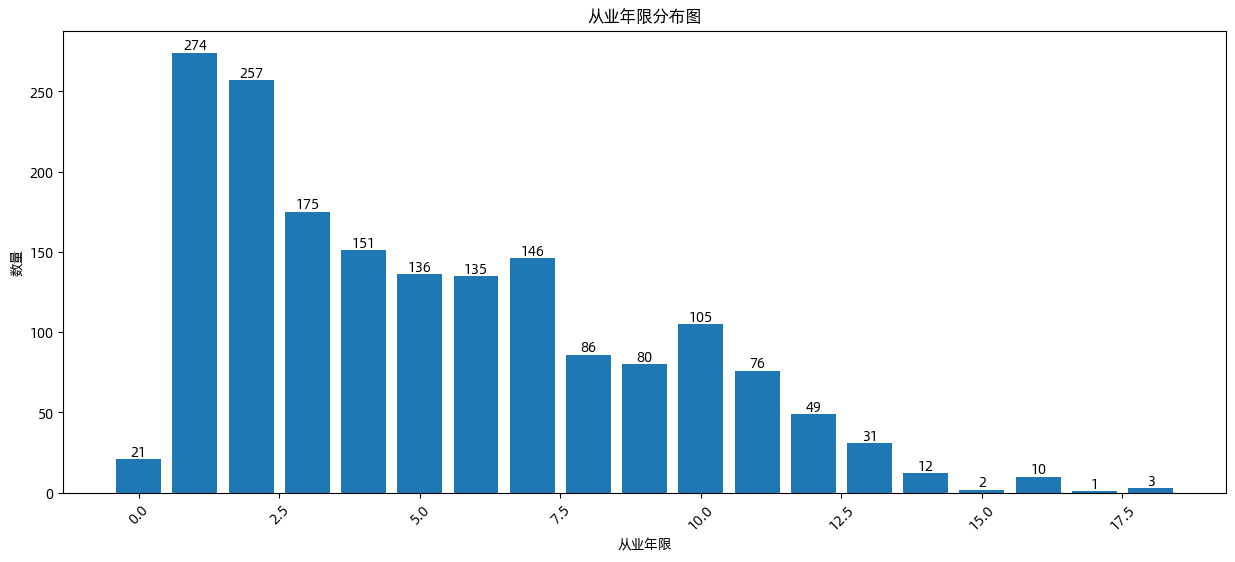

In [58]:
# 统计从业年限数量
con_year_counts = display_df['从业'].value_counts().reset_index()
con_year_counts.columns = ['从业','数量']
# 按照从业年限排序
con_year_counts = con_year_counts.sort_values('从业')

draw_single_bar(con_year_counts,'从业','数量','从业年限分布图','从业年限','数量',15,6)


In [59]:
# 按姓名分类查看每人覆盖的区域
display_df.groupby('姓名')['区域'].nunique().sort_values(ascending=False).describe()

count    892.000000
mean       1.022422
std        0.155525
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: 区域, dtype: float64

- 绝大多数的顾问专注于一个区域，极少的顾问会负责多个区域的房产

# 特征预处理

In [60]:
feature_process_df = display_df.copy()

先把顾问的特征删除掉

In [61]:
feature_process_df = feature_process_df.drop(['姓名','从业','客户','编号'],axis=1)

删除掉特征室 厅 卫 阳 

In [62]:
feature_process_df = feature_process_df.drop(['室','厅','卫','阳'], axis=1)
predict_source_datas = predict_source_datas.drop(['室','厅','卫','阳'], axis=1)


In [63]:
feature_process_df.duplicated().sum() #查看重复数量

12

In [64]:
# 删除重复数据
feature_process_df = feature_process_df.drop_duplicates(keep=False) 
feature_process_df.duplicated().sum() #查看重复数量

0

In [65]:
# 缺失值查看
missing_check(feature_process_df)

Series([], dtype: int64)

In [66]:
feature_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1982
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   小区      1726 non-null   object  
 1   随时可看    1726 non-null   int8    
 2   满二      1726 non-null   int8    
 3   满五      1726 non-null   int8    
 4   复式      1726 non-null   int8    
 5   带花园或露台  1726 non-null   int8    
 6   带车位     1726 non-null   int8    
 7   地铁房     1726 non-null   int8    
 8   电梯      1726 non-null   int8    
 9   售价      1726 non-null   float32 
 10  单价      1726 non-null   float32 
 11  面积      1726 non-null   float32 
 12  朝向      1726 non-null   category
 13  层高      1726 non-null   category
 14  区域      1726 non-null   category
 15  商圈1     1726 non-null   object  
 16  商圈2     1726 non-null   object  
 17  年代      1726 non-null   int16   
 18  户型      1726 non-null   category
dtypes: category(4), float32(3), int16(1), int8(8), object(3)
memory usage: 98.7+ KB


## 小区分类

计算每个小区单价的中位数后排名，分为三类‘平价小区’、‘中价小区’和‘高价小区’，替换小区名称特征。

In [67]:
# 小区分类
def get_community_type(datas):
    # 根据小区的单价中位数进行分类‘平价小区’、‘中价小区’、‘高价小区’
    community_median_price = datas.groupby('小区')['单价'].median()

    bins = [0, community_median_price.quantile(0.33), community_median_price.quantile(0.67), np.inf]
    labels = ['平价小区', '中价小区', '高价小区']
    # 使用 cut 函数创建新列
    datas['小区类别'] = pd.cut(community_median_price, bins=bins, labels=labels).reindex(datas['小区']).values
    del datas['小区']
    return datas

In [68]:
feature_process_df = get_community_type(feature_process_df)

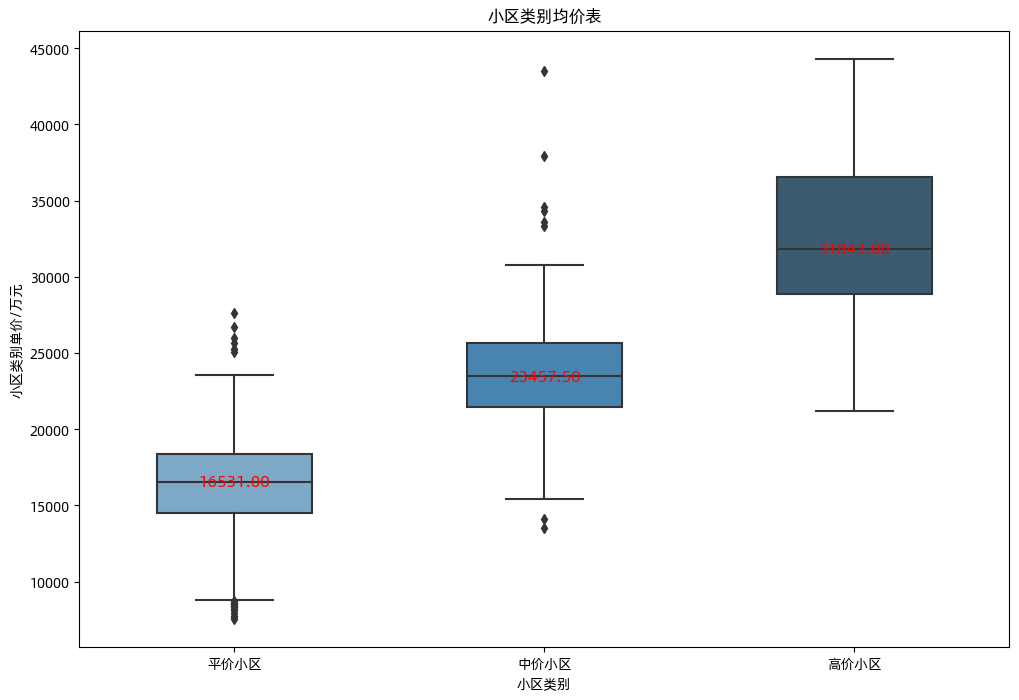

In [69]:
# 按不同分类查看单位面积价格中位数
median_prices = feature_process_df.groupby('小区类别')['单价'].median().sort_values()
sorted_index = median_prices.index

draw_boxplot(data=feature_process_df, x='小区类别', y='单价', order=sorted_index, title='小区类别均价表',palette='Blues_d', width=0.5, xlabel='小区类别', ylabel='小区类别单价/万元')

In [70]:
feature_process_df.columns

Index(['随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯', '售价', '单价',
       '面积', '朝向', '层高', '区域', '商圈1', '商圈2', '年代', '户型', '小区类别'],
      dtype='object')

In [71]:
del feature_process_df['小区类别']

## 商圈处理

因为数据中没有商圈的坐标数据，这里对商圈进行简化操作。有坐标数据可以计算两个商圈的距离等数据，加强相关性分析。

这里根据商圈数量计数，无商圈0，1个商圈1，2个商圈2。后续优化可以考虑根据商圈周边单价的中位数给商圈分级，分配权重进行处理。

In [72]:
feature_process_df.columns
# test_df = feature_process_df[['售价', '单价','面积', '朝向', '层高', '区域', '户型', '小区类别', '商圈1', '商圈2']]

Index(['随时可看', '满二', '满五', '复式', '带花园或露台', '带车位', '地铁房', '电梯', '售价', '单价',
       '面积', '朝向', '层高', '区域', '商圈1', '商圈2', '年代', '户型'],
      dtype='object')

In [73]:
shoppingCenter_rank_df = shoppingCenter_rank_df[['商圈','权重']]

In [74]:
def process_shoppingCeter(datas,shoppingCenter_rank_df):
    merged_df = pd.merge(datas, shoppingCenter_rank_df, left_on='商圈1', right_on='商圈', how='left')
    merged_df = pd.merge(merged_df, shoppingCenter_rank_df, left_on='商圈2', right_on='商圈', how='left')


    merged_df['商圈权重'] = merged_df['权重_x'] + merged_df['权重_y']
    merged_df['商圈权重'] = merged_df['商圈权重'].astype('float32')
    merged_df = merged_df.drop(['商圈1','商圈2','商圈_x','商圈_y','权重_x','权重_y'],axis=1)
    return merged_df

feature_process_df = process_shoppingCeter(feature_process_df,shoppingCenter_rank_df)

predict_source_datas = process_shoppingCeter(predict_source_datas,shoppingCenter_rank_df)

## 年代分类

当前年份中减去“年代”来计算房屋的年龄。

In [75]:
def year_cut(datas):
    import datetime
    current_year = datetime.datetime.now().year

    # 将年份数据分成四个时间段
    bins = [-np.inf, 1989, 1999, 2009, current_year]
    labels = ['7080s', '90s', '00s', '10s']
    datas['年代'] = pd.cut(datas['年代'], bins=bins, labels=labels)
    return datas
    
year_df = feature_process_df.copy()
year_df = year_cut(year_df)

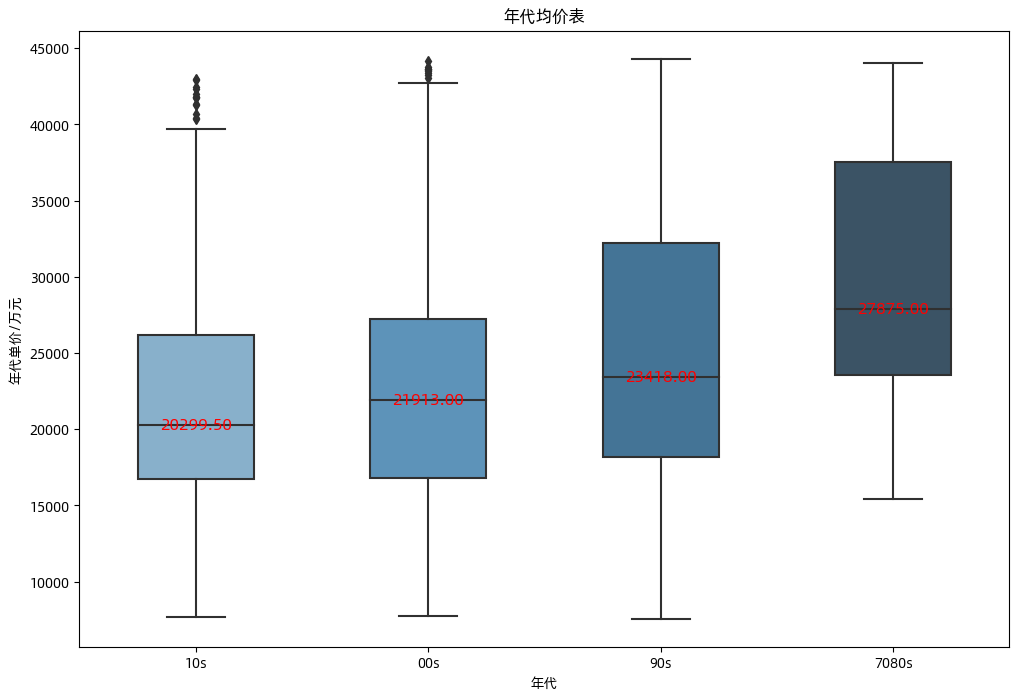

In [76]:
# 按不同分类查看单位面积价格中位数
year_median_prices = year_df.groupby('年代')['单价'].median().sort_values()
year_sorted_index = year_median_prices.index

draw_boxplot(data=year_df, x='年代', y='单价', order=year_sorted_index, title='年代均价表',palette='Blues_d', width=0.5, xlabel='年代', ylabel='年代单价/万元')

# 特征处理

In [77]:
# 剔除“复式”特征，因为它与“大户型”和“中户型”两个特征高度相关
# 剔除“带花园或露台”特征，因为它与“大户型”和“中户型”两个特征高度相关
# 剔除“朝向”特征，因为它对预测单价的影响可能不太明显
# 剔除“电梯”特征，因为它与“层高”特征高度相关
process_feature_df = feature_process_df.copy()
process_feature_df = process_feature_df.drop(['复式','带花园或露台','朝向','电梯','年代','售价'],axis=1)

<Axes: >

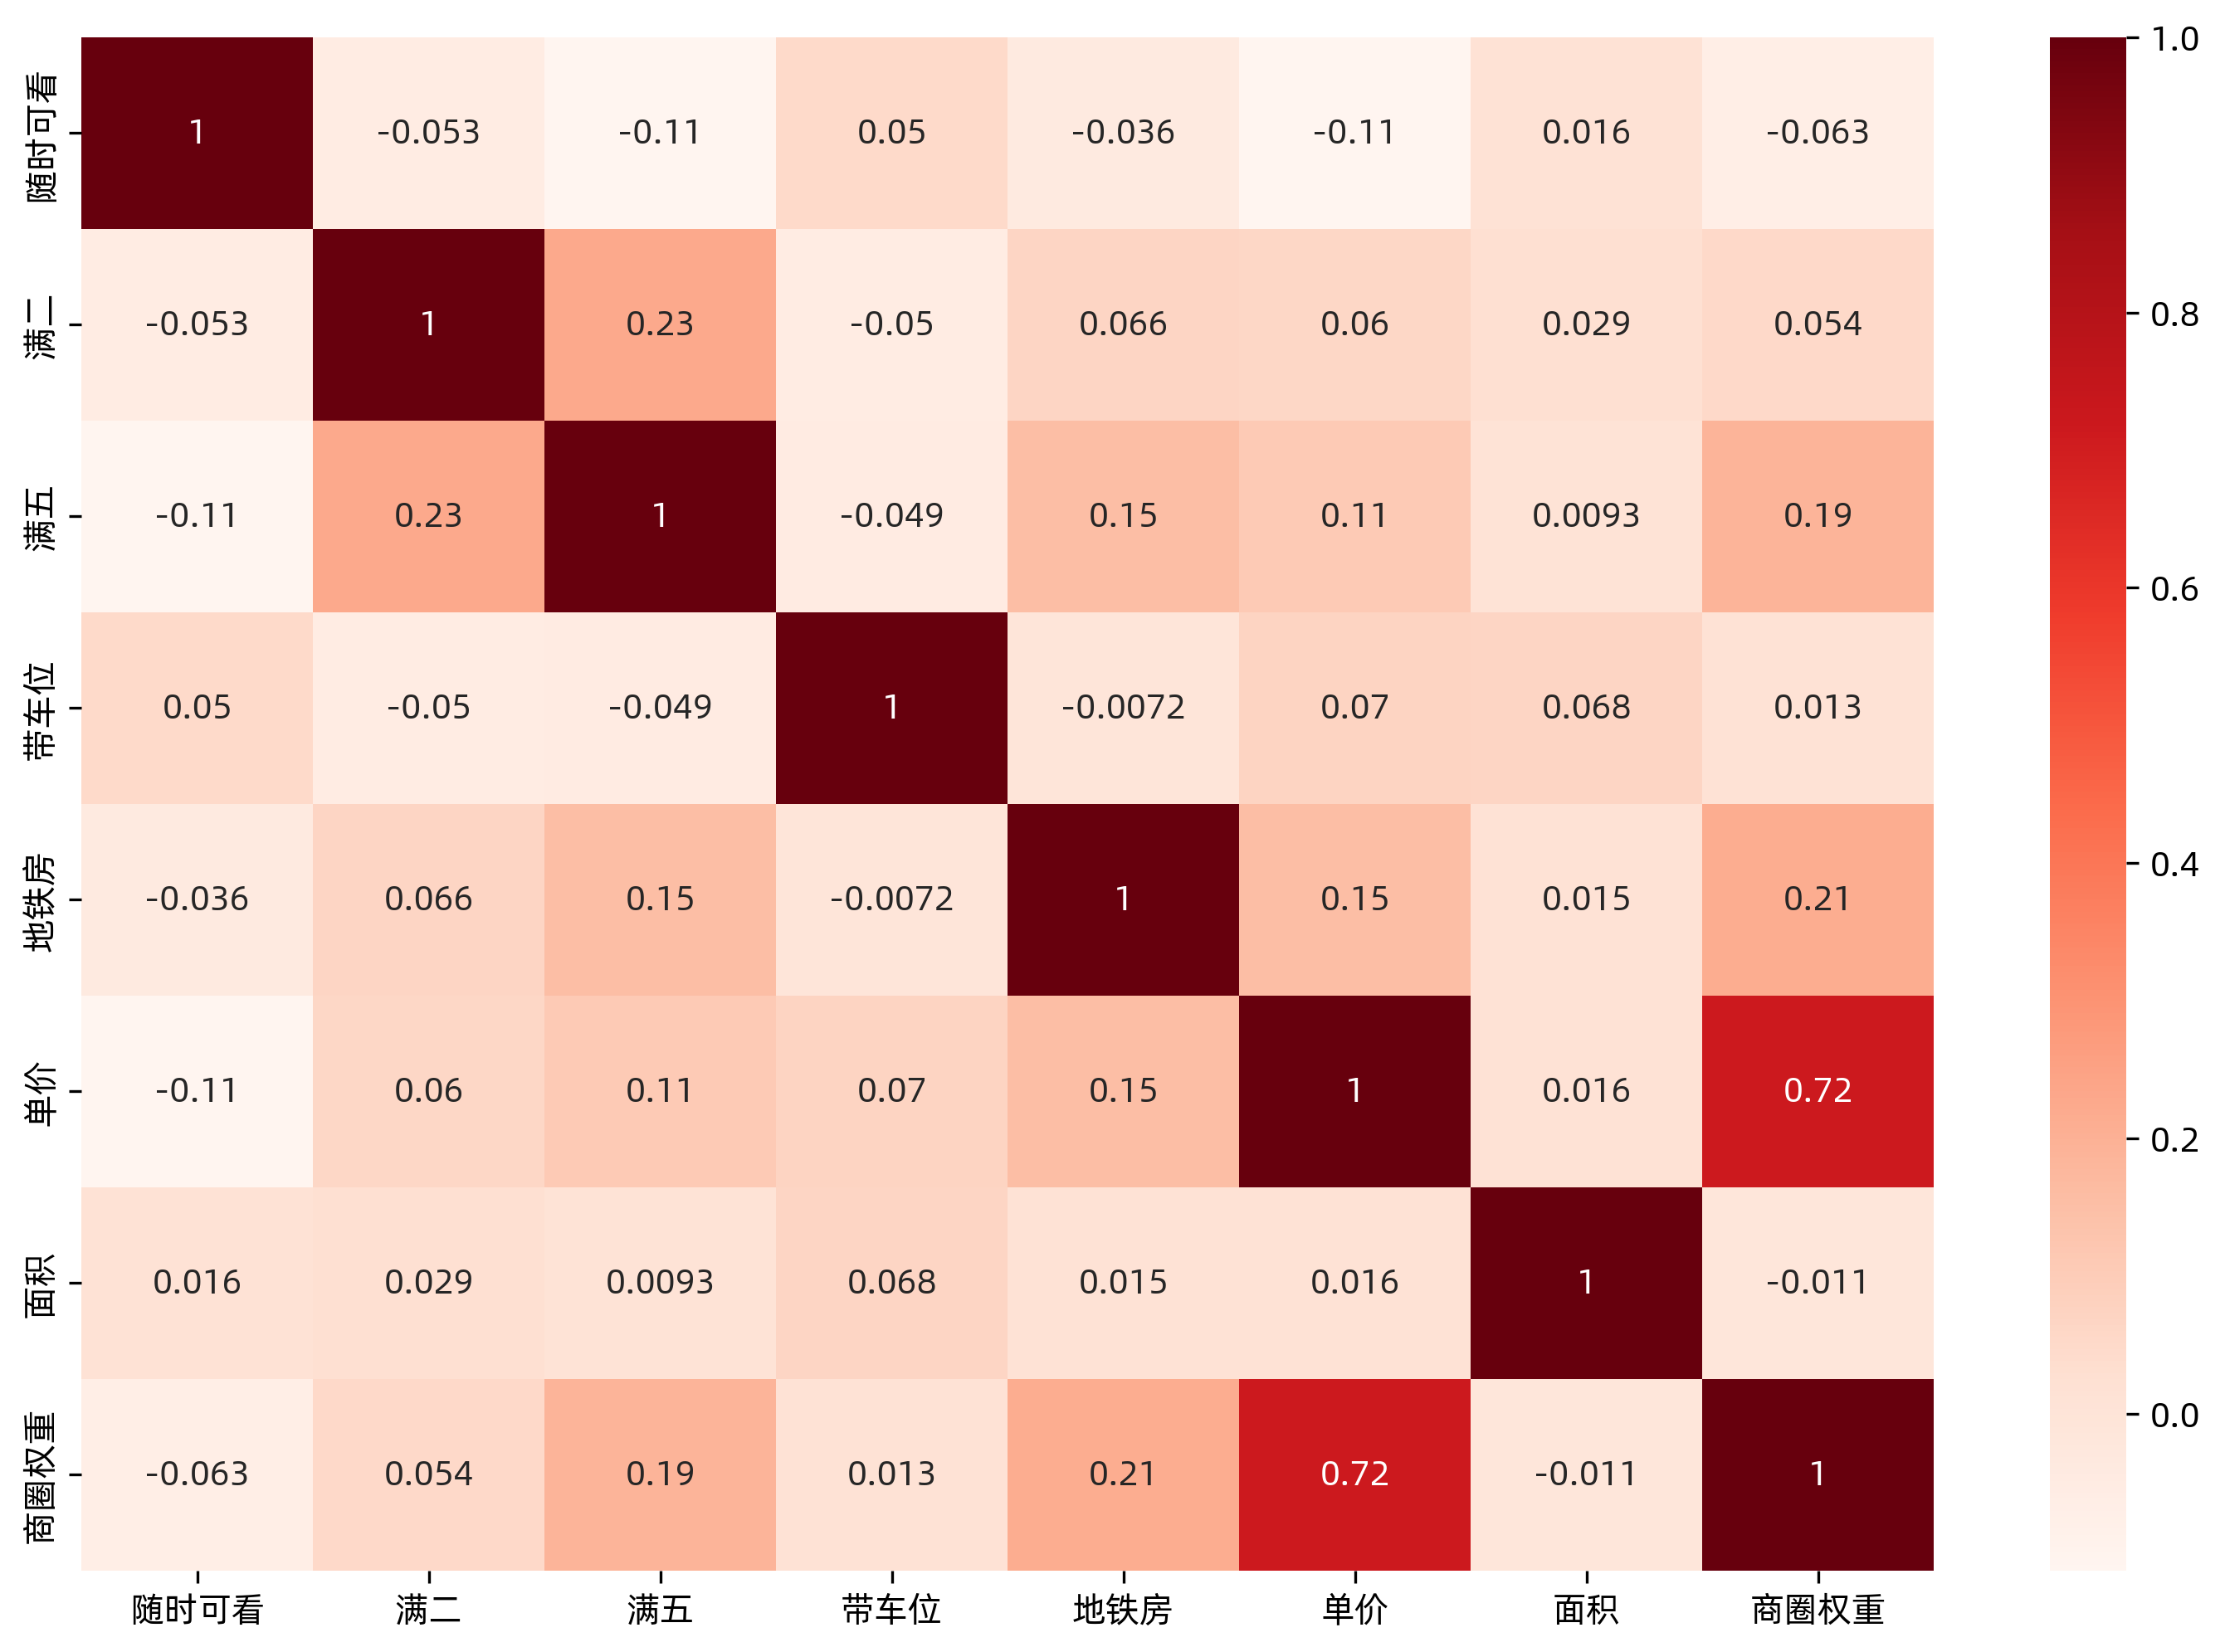

In [78]:
# 计算特征相关系数矩阵
corr_matrix = process_feature_df.corr()

# 可视化相关系数矩阵
plt.figure(figsize=(12, 8),dpi=300)
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

## 合并数据集

In [79]:
# 添加新列
predict_source_datas['标记'] = 'predict'
process_feature_df['标记'] = 'data'
process_feature_df['标记'] = process_feature_df['标记'].astype('category')
# 将两个 DataFrame 合并成一个
final_df = pd.concat([predict_source_datas, process_feature_df])

In [80]:
final_df

,随时可看,满二,满五,带车位,地铁房,层高,面积,区域,户型,商圈权重,标记,单价
0,1,1,0,0,1,低楼层,70.000000,晋安区,小户型,89.0,predict,NaN
1,1,1,0,0,1,低楼层,70.000000,晋安区,小户型,137.0,predict,NaN
2,1,1,0,0,1,中楼层,90.000000,晋安区,小户型,89.0,predict,NaN
3,1,1,0,0,1,中楼层,90.000000,晋安区,小户型,137.0,predict,NaN
4,1,1,0,0,1,高楼层,120.000000,晋安区,中户型,137.0,predict,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1721,1,1,0,0,0,中楼层,118.019997,闽侯,中户型,19.0,data,14404.0
1722,1,1,0,0,0,中楼层,95.199997,闽侯,中户型,37.0,data,17331.0
1723,1,1,0,0,0,中楼层,82.870003,闽侯,小户型,37.0,data,14239.0
1724,0,1,1,0,0,低楼层,107.440002,闽侯,大户型,15.0,data,17405.0


## 类别特征-one-hot编码

In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1725
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   随时可看    1731 non-null   int64   
 1   满二      1731 non-null   int64   
 2   满五      1731 non-null   int64   
 3   带车位     1731 non-null   int64   
 4   地铁房     1731 non-null   int64   
 5   层高      1731 non-null   object  
 6   面积      1731 non-null   float64 
 7   区域      1731 non-null   object  
 8   户型      1731 non-null   category
 9   商圈权重    1731 non-null   float32 
 10  标记      1731 non-null   object  
 11  单价      1726 non-null   float32 
dtypes: category(1), float32(2), float64(1), int64(5), object(3)
memory usage: 150.6+ KB


In [82]:
# 指定每列的数据类型
dtypes = {'随时可看': 'int8', '满二': 'int8', '满五': 'int8', '带车位': 'int8', '地铁房': 'int8', 
          '层高': 'category', '区域': 'category', '户型': 'category','标记': 'category',
          '面积': 'float32', '商圈权重': 'float32','单价': 'float32'}

# 使用 astype() 方法修改每列的数据类型
final_df = final_df.astype(dtypes)

In [83]:
# 创建空字典
col_dic = {}
# 各列的内容添加到对应的列名key中
for col_name in final_df.columns:
    if final_df[col_name].dtype != 'float32' and final_df[col_name].dtype != 'float64':
      col_dic[col_name] = list(final_df[col_name].unique())
col_dic

{'随时可看': [1, 0],
 '满二': [1, 0],
 '满五': [0, 1],
 '带车位': [0, 1],
 '地铁房': [1, 0],
 '层高': ['低楼层', '中楼层', '高楼层'],
 '区域': ['晋安区', '鼓楼区', '仓山区', '金山', '马尾区', '闽侯'],
 '户型': ['小户型', '中户型', '大户型', '超大户型'],
 '标记': ['predict', 'data']}

In [84]:
cat_cols = final_df.select_dtypes(include=['category']).columns.tolist()

In [85]:
cat_cols

['层高', '区域', '户型', '标记']

In [86]:
final_df = final_df.reset_index(drop=True)
final_df.columns

Index(['随时可看', '满二', '满五', '带车位', '地铁房', '层高', '面积', '区域', '户型', '商圈权重', '标记',
       '单价'],
      dtype='object')

In [87]:
def process_one_hot(datas:DataFrame, col_name:str):
    # 定义分类变量
    features = datas[col_name]
    
    # One-Hot 编码
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded_features = onehot_encoder.fit_transform(features.to_numpy().reshape(-1, 1))

    # 将 One-Hot 编码后的分类变量转换为 DataFrame
    onehot_encoded_feature_df = pd.DataFrame(
        onehot_encoded_features, columns=[fea for fea in onehot_encoder.categories_[0]])

    # 替换原始的分类变量列
    datas = pd.concat([datas.drop(col_name, axis=1), onehot_encoded_feature_df], axis=1)
    return datas


from sklearn.preprocessing import OneHotEncoder

one_hot_df = final_df.copy()


# 对所有分类变量进行编码
for col in cat_cols:
    if col != '标记':
        one_hot_df = process_one_hot(one_hot_df, col)

In [88]:
one_hot_df.columns

Index(['随时可看', '满二', '满五', '带车位', '地铁房', '面积', '商圈权重', '标记', '单价', '中楼层',
       '低楼层', '高楼层', '仓山区', '晋安区', '金山', '闽侯', '马尾区', '鼓楼区', '中户型', '大户型',
       '小户型', '超大户型'],
      dtype='object')

## 数值特征-归一化

In [89]:
nun_cols = final_df.select_dtypes(include=['float32']).columns.tolist()
nun_cols.remove('单价')

In [90]:
norm_df = one_hot_df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  
for feature in nun_cols:
    scaler.fit(norm_df[feature].values.reshape(-1, 1))
    norm_df[feature] = scaler.transform(norm_df[feature].values.reshape(-1, 1))

In [91]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   随时可看    1731 non-null   int8    
 1   满二      1731 non-null   int8    
 2   满五      1731 non-null   int8    
 3   带车位     1731 non-null   int8    
 4   地铁房     1731 non-null   int8    
 5   面积      1731 non-null   float32 
 6   商圈权重    1731 non-null   float32 
 7   标记      1731 non-null   category
 8   单价      1726 non-null   float32 
 9   中楼层     1731 non-null   float64 
 10  低楼层     1731 non-null   float64 
 11  高楼层     1731 non-null   float64 
 12  仓山区     1731 non-null   float64 
 13  晋安区     1731 non-null   float64 
 14  金山      1731 non-null   float64 
 15  闽侯      1731 non-null   float64 
 16  马尾区     1731 non-null   float64 
 17  鼓楼区     1731 non-null   float64 
 18  中户型     1731 non-null   float64 
 19  大户型     1731 non-null   float64 
 20  小户型     1731 non-null   float64 
 21  超大户型    1731 n

In [92]:
norm_df

,随时可看,满二,满五,带车位,地铁房,面积,商圈权重,标记,单价,中楼层,...,仓山区,晋安区,金山,闽侯,马尾区,鼓楼区,中户型,大户型,小户型,超大户型
0,1,1,0,0,1,0.228254,0.428571,predict,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,0,1,0.228254,0.673469,predict,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,0,0,1,0.338150,0.428571,predict,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,0,1,0.338150,0.673469,predict,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0,0,1,0.502995,0.673469,predict,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1,1,0,0,0,0.492115,0.071429,data,14404.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1727,1,1,0,0,0,0.366723,0.163265,data,17331.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1728,1,1,0,0,0,0.298973,0.163265,data,14239.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1729,0,1,1,0,0,0.433980,0.051020,data,17405.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## 相关性分析

In [93]:
corr_df = norm_df.copy()

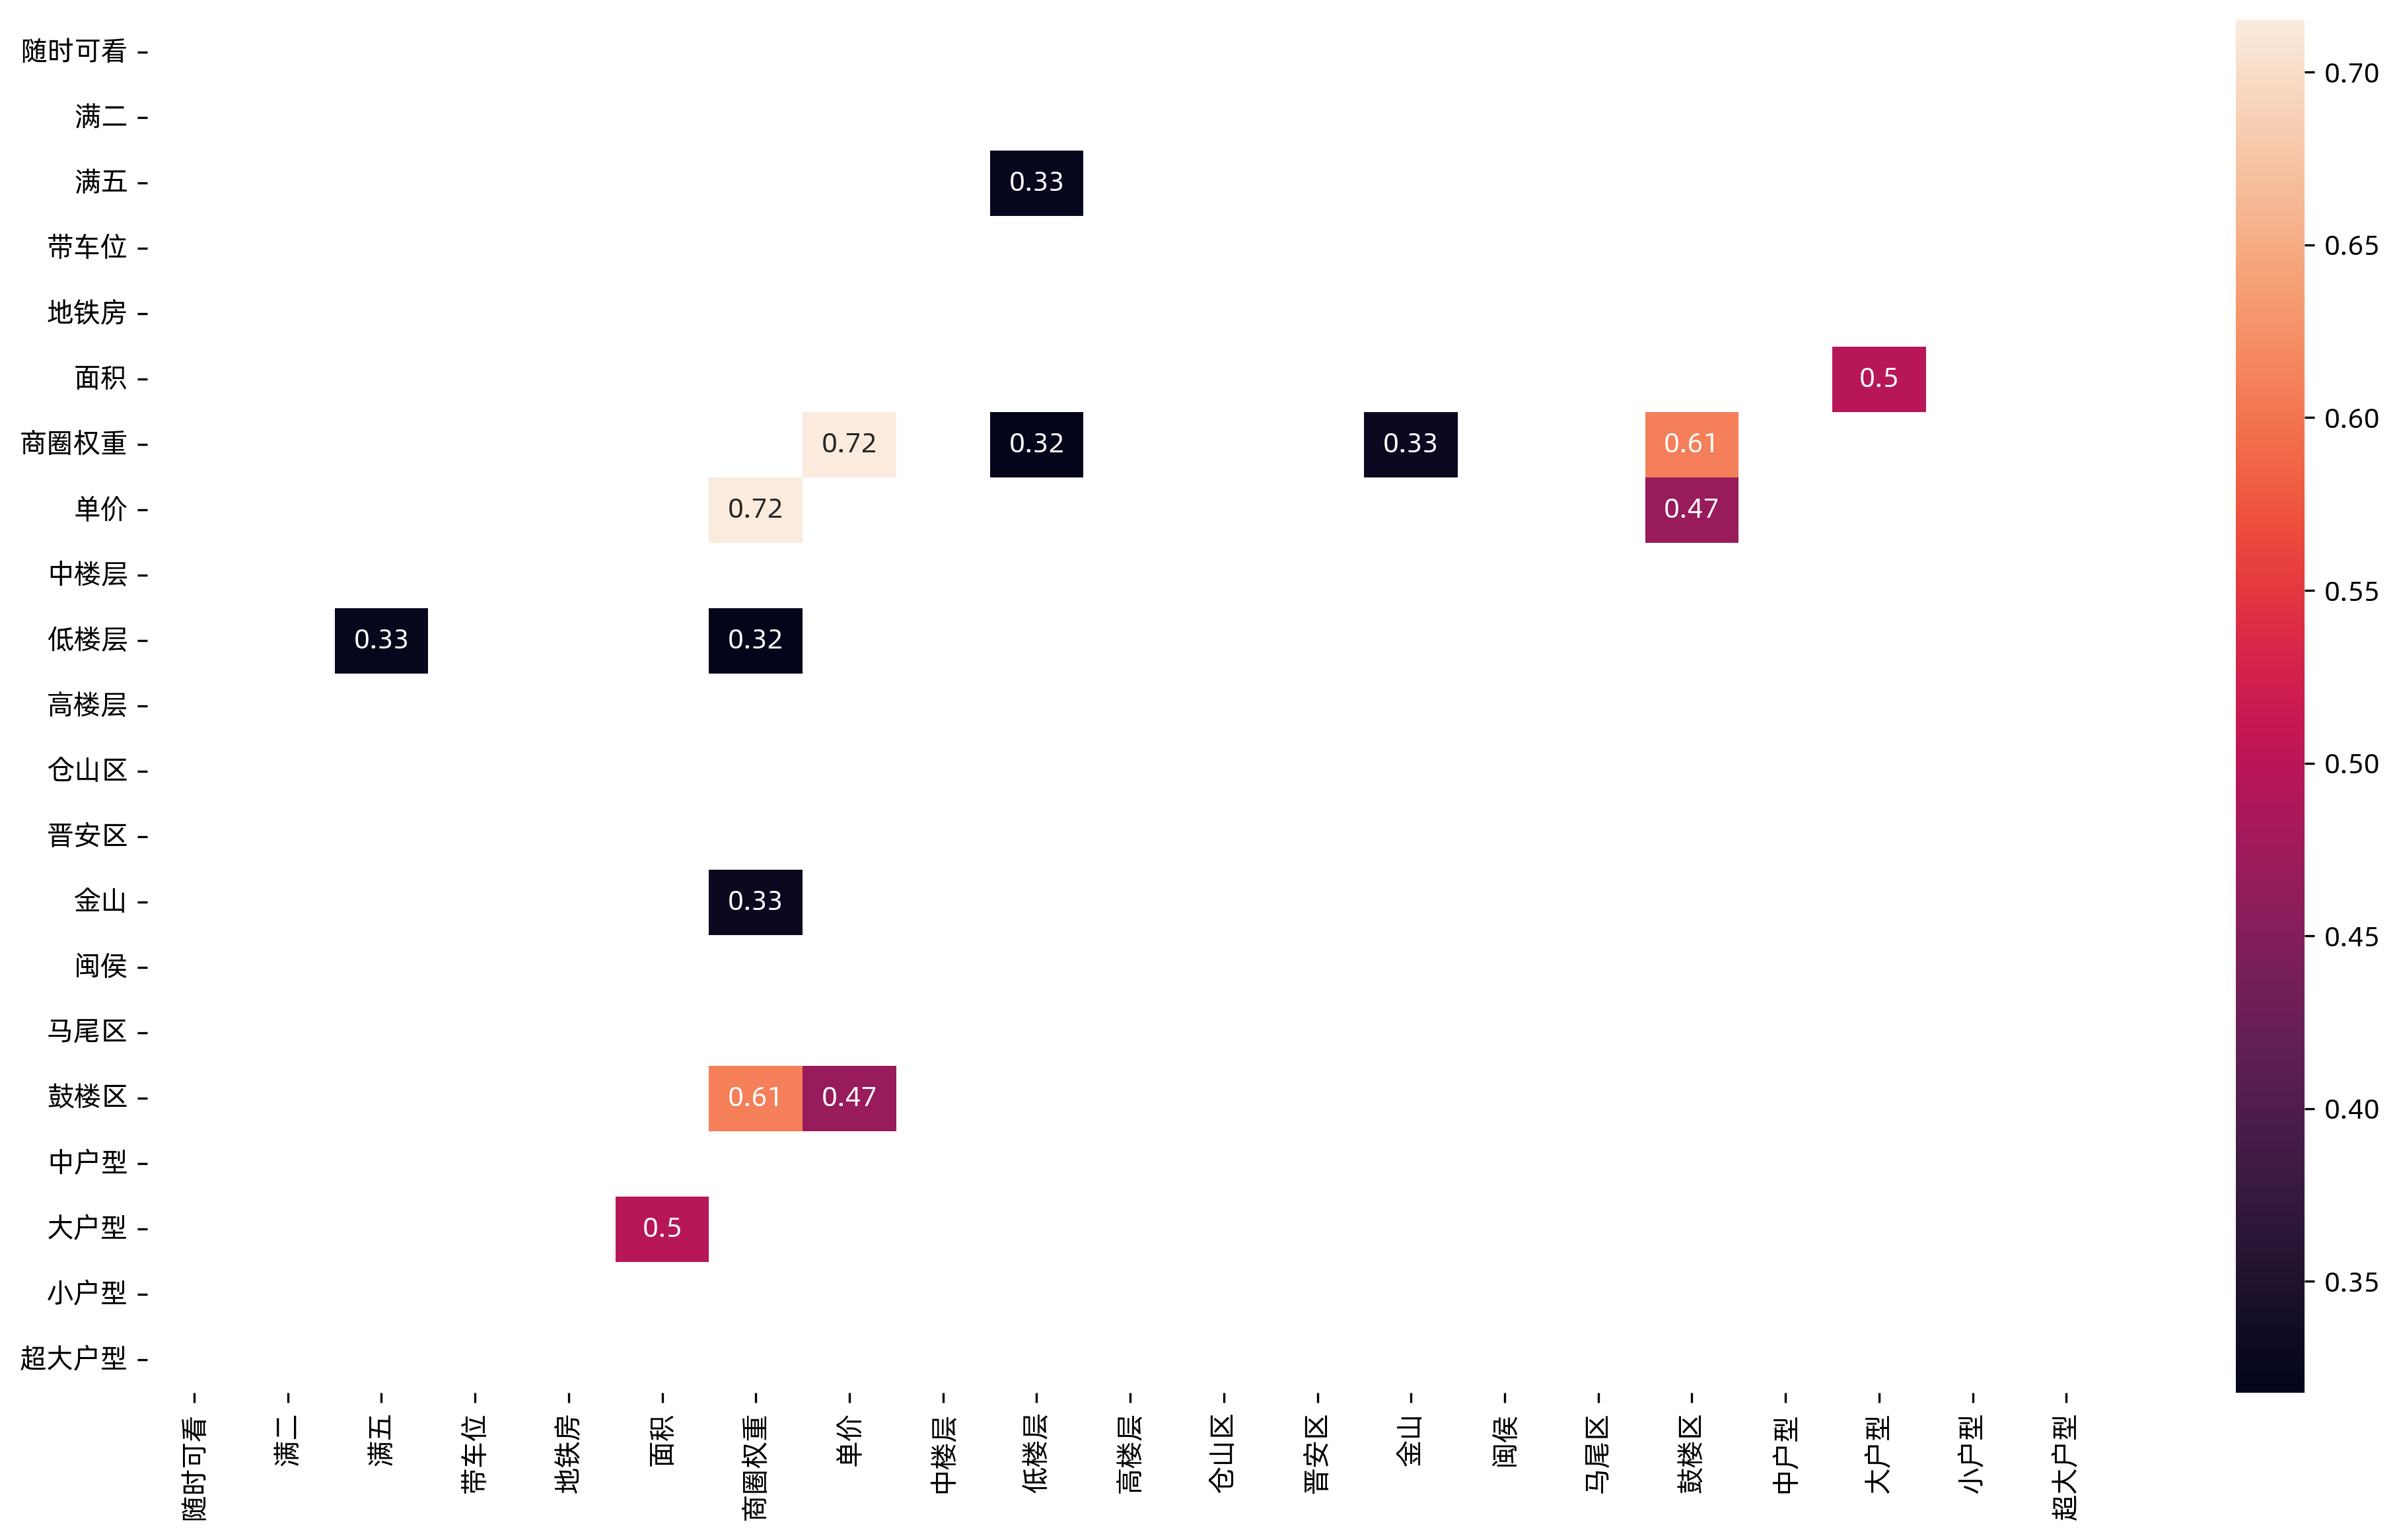

In [94]:
corr_matrix =  corr_df.corr()
# # 过滤相关系数小于0.1的
corr_feature = corr_matrix[(corr_matrix > 0.3) & (corr_matrix < 1)]
# 设置图表大小
plt.figure(figsize=(16, 9),dpi=300)

# 可视化分析
sns.heatmap(corr_feature, annot=True)
# 显示图表
plt.show()

In [95]:
corr_list = corr_feature.index.tolist()
corr_list.remove('单价')
print(corr_list)

['随时可看', '满二', '满五', '带车位', '地铁房', '面积', '商圈权重', '中楼层', '低楼层', '高楼层', '仓山区', '晋安区', '金山', '闽侯', '马尾区', '鼓楼区', '中户型', '大户型', '小户型', '超大户型']


## 划分训练集和验证集

In [96]:
from sklearn.model_selection import train_test_split

train_data = norm_df[norm_df['标记']=='data']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(train_data[corr_list], train_data['单价'], test_size=0.2, random_state=42)

X_test = norm_df[norm_df['标记']=='predict'][corr_list]

# 打印划分后的数据集大小
print(f"训练集大小：{X_train.shape[0]}，验证集大小：{X_val.shape[0]}")

训练集大小：1380，验证集大小：346


# 建立模型

## 模型建立

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [98]:
# 设置 KFold，交叉采样法拆分数据集
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 定义基本模型
base_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='linear')
}

# 定义评估指标
scorings = {'MSE': 'neg_mean_squared_error', 'MAE': 'neg_mean_absolute_error', 'R2': 'r2'}
scores_list = []
for model in base_models.values():
    s_list = []
    for score_name, scoring in scorings.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
        if score_name == 'R2':
            s_list.append(round(scores.mean(), 2))
        else:
            s_list.append(round(-scores.mean(), 2))
    scores_list.append(np.array(s_list))
scores_array = np.array(scores_list)

# 转换为 DataFrame
scores_df = pd.DataFrame(scores_array, index=base_models.keys(), columns=scorings.keys())

- 均方误差（MSE）：MSE是预测值与真实值之间差的平方的平均值。MSE越小，说明模型的预测误差越小，模型的预测性能越好。
- 平均绝对误差（MAE）：MAE是预测值与真实值之间差的绝对值的平均值。MAE越小，说明模型的预测误差越小，模型的预测性能越好。
- 确定系数（R2）：R2是预测值与真实值之间的相关性的平方，它的取值范围在0到1之间。R2越接近1，说明模型的预测性能越好，R2越接近0，说明模型的预测性能越差。

## 模型比较

In [99]:
scores_df

,MSE,MAE,R2
Linear Regression,25710842.38,3850.82,0.54
Ridge Regression,25654362.84,3851.61,0.54
Lasso Regression,25651326.24,3850.82,0.54
ElasticNet Regression,42824869.00,5128.07,0.24
Random Forest,20390308.04,3319.35,0.64
Support Vector Regression,56767740.77,5849.80,-0.00


随机森林(Random Forest)模型在三个指标中表现最好；

其次是岭回归(Ridge Regression)和套索回归(Lasso Regression)模型；

而支持向量回归(Support Vector Regression)模型表现最差。

## 参数调优

In [100]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

# 定义随机森林模型
rf_model = RandomForestRegressor(random_state=42)

# 定义网格搜索
grid_search = GridSearchCV(rf_model, param_grid, cv=kf, scoring='neg_mean_squared_error')

# 在训练集上拟合网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best parameters:  {'max_depth': 15, 'n_estimators': 200}
Best score:  20210368.547792464


## 验证评估

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 使用最佳参数定义随机森林模型
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)

# 在训练集上训练模型
rf_model.fit(X_train, y_train)

# 在验证集上预测并评估模型性能
y_pred = rf_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# 输出评估结果
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 17307241.62
MAE: 3050.20
R2: 0.70


模型在未见过的测试数据上表现得不错，能够很好地泛化到新的数据集上。

# 模型预测

**房产预测参数在predict.xlsx文件内填写**

In [102]:
# 定义随机森林模型
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)

# 在训练集和验证集上合并训练模型
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
rf_model.fit(X_train_val, y_train_val)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [103]:
# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

In [104]:
# 导出预测结果
p_source_datas['单价'] = y_pred.round(2)
p_source_datas['总价'] = round((p_source_datas['单价'] * p_source_datas['面积'])/10000,2)

In [105]:
# 打印预测参数和预测结果
p_source_datas

,随时可看,满二,满五,带车位,地铁房,层高,面积,室,厅,卫,阳,区域,商圈1,商圈2,单价,总价
0,1,1,0,0,1,低楼层,70,2,1,1,1,晋安区,世欧王庄,NaN,20213.07,141.49
1,1,1,0,0,1,低楼层,70,2,1,1,1,晋安区,世欧王庄,东泰禾商圈,24863.58,174.05
2,1,1,0,0,1,中楼层,90,3,1,1,1,晋安区,世欧王庄,NaN,28755.27,258.80
3,1,1,0,0,1,中楼层,90,3,1,1,1,晋安区,世欧王庄,东泰禾商圈,27897.30,251.08
4,1,1,0,0,1,高楼层,120,3,1,2,2,晋安区,世欧王庄,东泰禾商圈,27579.23,330.95


In [106]:
# 将 DataFrame 输出到 Excel 文件
p_source_datas.to_excel('./result.xlsx', index=False)
print('结果已经保存到本地')

结果已经保存到本地
